# **스프린트 미션 소개**

이번 미션에서는 포르투갈 은행의 마케팅 데이터를 분석해볼 예정입니다. 이 실습에서는 결정 트리와 앙상블 기법을 사용하여 분류 모델을 구축하고, 마케팅 캠페인의 효율성을 높이는 전략을 도출해 보겠습니다.

## **미션 배경**

여러분은 지금부터 포르투갈 은행의 마케팅 담당자입니다. 데이터는 2008년부터 2010년까지의 은행 마케팅 캠페인 데이터를 포함하고 있습니다. 여러분의 목표는 이 데이터를 통해 고객이 정기 예금을 가입할 가능성을 예측하고, 이를 통해 마케팅 캠페인의 효율성을 높이는 것입니다. 마케팅 담당자로서 정기 예금과 관련이 있는 요소들을 파악해보고, 고객의 행동을 이해해보세요. 어떤 상황에서 어떤 고객들이 정기 예금을 가입할까요?

이번 미션의 최종 목표는 가장 정확한 분류 모델을 개발하여 고객이 정기 예금을 가입할지 여부를 예측하고, 그 모델을 통해 도출한 인사이트를 바탕으로 비즈니스 전략을 제시하는 것입니다.

## **데이터 소개**

| 컬럼명            | 설명                                           |
|-------------------|------------------------------------------------|
| age               | 나이 (숫자)                                    |
| job               | 직업 (범주형)                                   |
| marital           | 결혼 여부 (범주형)                              |
| education         | 교육 수준 (범주형)                              |
| default           | 신용 불량 여부 (범주형)                         |
| housing           | 주택 대출 여부 (범주형)                         |
| loan              | 개인 대출 여부 (범주형)                         |
| contact           | 연락 유형 (범주형)                              |
| month             | 마지막 연락 월 (범주형)                         |
| day_of_week       | 마지막 연락 요일 (범주형)                       |
| duration          | 마지막 연락 지속 시간, 초 단위 (숫자)          |
| campaign          | 캠페인 동안 연락 횟수 (숫자)                   |
| pdays             | 이전 캠페인 후 지난 일수 (숫자)                |
| previous          | 이전 캠페인 동안 연락 횟수 (숫자)              |
| poutcome          | 이전 캠페인의 결과 (범주형)                     |
| emp.var.rate      | 고용 변동률 (숫자)                              |
| cons.price.idx    | 소비자 물가지수 (숫자)                         |
| cons.conf.idx     | 소비자 신뢰지수 (숫자)                         |
| euribor3m         | 3개월 유리보 금리 (숫자)                       |
| nr.employed       | 고용자 수 (숫자)                                |
| y                 | 정기 예금 가입 여부 (이진: yes=1, no=0)          |

해당 데이터는 UC Irvine Machine Learning Repository에서 제공하는 Bank Marketing(링크) 데이터 입니다. 여러 데이터 중 2014년 아래 논문에서 사용된 데이터를 선택하였습니다. 데이터에 대해서 더 자세히 알고 싶은 분들은 아래 데이터 설명 txt파일과 논문을 확인해보시는 걸 추천드립니다.

- 데이터 설명

    [bank-additional-names.txt](https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=10725&version=2&directory=/bank-additional-names.txt&name=bank-additional-names.txt)

- 데이터 출처

    [Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press,](http://dx.doi.org/10.1016/j.dss.2014.03.001)

## **데이터 설명 번역본**

<details>
<summary>토글 접기/펼치기</summary>
<div markdown="1">
<br/>

인용 요청:

이 데이터 세트는 연구 목적으로 공개적으로 사용할 수 있습니다. 자세한 내용은 [Moro et al., 2014]에 설명되어 있습니다.
이 데이터베이스를 사용하려면 다음 인용문을 포함하십시오.

[Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. 은행 텔레마케팅의 성공을 예측하기 위한 데이터 기반 접근 방식. Decision Support Systems, 발행 예정, http://dx.doi.org/10.1016/j.dss.2014.03.001

사용 가능 위치: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

# **제목: 은행 마케팅 (사회/경제적 맥락 포함)**

## **출처**

---

생성자: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho), Paulo Rita (ISCTE-IUL) @ 2014

## **과거 사용**

---

- 전체 데이터 세트(bank-additional-full.csv)는 다음에 설명 및 분석되었습니다.
- S. Moro, P. Cortez, and P. Rita. 은행 텔레마케팅의 성공을 예측하기 위한 데이터 기반 접근 방식. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

## **관련 정보**

---

- 이 데이터 세트는 "은행 마케팅" UCI 데이터 세트를 기반으로 합니다(설명은 http://archive.ics.uci.edu/ml/datasets/Bank+Marketing 참조).
- 데이터는 포르투갈 은행에서 발표하고 https://www.bportugal.pt/estatisticasweb에서 공개적으로 사용할 수 있는 5개의 새로운 사회 및 경제적 특징/속성(약 1천만 인구 국가의 전국 지표)을 추가하여 풍부하게 구성되었습니다.
- 이 데이터 세트는 [Moro et al., 2014]에서 사용된 데이터 세트와 거의 동일합니다(개인 정보 보호 문제로 인해 모든 속성이 포함되지는 않음).
- rminer 패키지 및 R 도구(http://cran.r-project.org/web/packages/rminer/)를%EB%A5%BC) 사용하여 5개의 새로운 사회 및 경제적 속성(여기서 제공됨)을 추가하면 통화 지속 시간이 포함되지 않더라도 성공 예측에 상당한 개선이 있음을 확인했습니다.
- 참고: 파일은 R에서 d=read.table("bank-additional-full.csv",header=TRUE,sep=";")를 사용하여 읽을 수 있습니다.
- zip 파일에는 두 개의 데이터 세트가 포함되어 있습니다.
    - bank-additional-full.csv: 모든 예제, 날짜순으로 정렬됨(2008년 5월부터 2010년 11월까지).
    - bank-additional.csv: bank-additional-full.csv에서 임의로 선택된 예제의 10%(4119개).
- 더 작은 데이터 세트는 계산적으로 더 많은 자원을 요구하는 기계 학습 알고리즘(예: SVM)을 테스트하기 위해 제공됩니다.
- 이진 분류 목표는 고객이 은행 정기 예금(변수 y)에 가입할지 여부를 예측하는 것입니다.

## **인스턴스 수**

---

bank-additional-full.csv의 경우 41188개

## **속성 수**

---

20 + 출력 속성

## **속성 정보**

자세한 내용은 [Moro et al., 2014]를 참조하십시오.

### **입력 변수**

---

#### **은행 고객 데이터**
- 1 - age (숫자)
- 2 - job: 직업 유형 (범주형: "admin", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
- 3 - marital: 결혼 상태 (범주형: "divorced", "married", "single", "unknown"; 참고: "divorced"는 이혼 또는 사별을 의미함)
- 4 - education: 교육 수준 (범주형: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
- 5 - default: 신용 불량 여부 (범주형: "no", "yes", "unknown")
- 6 - housing: 주택 융자 여부 (범주형: "no", "yes", "unknown")
- 7 - loan: 개인 융자 여부 (범주형: "no", "yes", "unknown")

#### **현재 캠페인의 마지막 연락과 관련된 정보**
- 8 - contact: 연락 통신 유형 (범주형: "cellular", "telephone")
- 9 - month: 마지막 연락 월 (범주형: "jan", "feb", "mar", ..., "nov", "dec")
- 10 - day_of_week: 마지막 연락 요일 (범주형: "mon", "tue", "wed", "thu", "fri")
- 11 - duration: 마지막 연락 지속 시간(초) (숫자). 중요 참고 사항: 이 속성은 출력 목표에 큰 영향을 미칩니다(예: duration=0이면 y="no"). 그러나 통화가 수행되기 전에 지속 시간을 알 수 없습니다. 또한 통화가 종료된 후 y를 명확하게 알 수 있습니다. 따라서 이 입력은 벤치마크 목적으로만 포함해야 하며 현실적인 예측 모델을 만들려는 경우 삭제해야 합니다.

#### **기타 속성**
- 12 - campaign: 이 캠페인 동안 이 고객에게 수행된 연락 횟수 (숫자, 마지막 연락 포함)
- 13 - pdays: 이전 캠페인에서 고객에게 마지막으로 연락한 후 경과된 일수 (숫자; 999는 이전에 고객에게 연락하지 않았음을 의미함)
- 14 - previous: 이 캠페인 전에 이 고객에게 수행된 연락 횟수 (숫자)
- 15 - poutcome: 이전 마케팅 캠페인의 결과 (범주형: "failure", "nonexistent", "success")
사회 및 경제적 맥락 속성
- 16 - emp.var.rate: 고용 변동률 - 분기별 지표 (숫자)
- 17 - cons.price.idx: 소비자 물가 지수 - 월별 지표 (숫자)
- 18 - cons.conf.idx: 소비자 신뢰 지수 - 월별 지표 (숫자)
- 19 - euribor3m: 유로존 3개월 금리 - 일별 지표 (숫자)
- 20 - nr.employed: 고용된 직원 수 - 분기별 지표 (숫자)

### **출력 변수 (원하는 목표)**

---

- 21 - y: 고객이 정기 예금에 가입했습니까? (이진형: "yes", "no")


## **누락된 속성 값**

---

일부 범주형 속성에 여러 누락된 값이 있으며 모두 "unknown" 레이블로 코딩되었습니다. 이러한 누락된 값은 가능한 클래스 레이블로 처리하거나 삭제 또는 대체 기술을 사용하여 처리할 수 있습니다.

</div>
</details>

---

# **라이브러리 import**

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 22.5 MB/s eta 0:00:00


In [ ]:
# 데이터 전처리 도구 불러오기
import pandas as pd
import numpy as np

# 데이터 시각화 도구 불러오기
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 검정 통계 라이브러리
import scipy.stats as stats
import itertools
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Scaler 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# train_test 분리 라이브러리
from sklearn.model_selection import train_test_split

# 트리 기반 분류분석 머신러닝 모델 불러오기
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

# GridSearch, RandomizedSearch 도구 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 평가 지표 불러오기
from sklearn.metrics import classification_report

# 경고 에러 무시 라이브러리 (최신 버전이 아님 이슈 메세지 제거)
import warnings

# pandas option
pd.set_option("display.max_columns", None)  # 모든 컬럼 출력
pd.set_option("display.expand_frame_repr", False)  # 줄바꿈 방지 (가로 스크롤 허용)

# **데이터 불러오기**

In [ ]:
# csv 파일의 컬럼이 ;로 구분되어 있어서 sep 옵션 사용
# 분류 예측 모델을 사용하기 위해 duration 컬럼을 삭제

# jupyter notebook
# df = pd.read_csv('./data/bank-additional-full.csv', sep=';').drop(labels='duration', axis=1)

# google colab
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/codeit/sprint_mission_15/data/bank-additional-full.csv', sep=';').drop(labels='duration', axis=1)

Mounted at /content/drive


In [ ]:
# 데이터 확인
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# **데이터 EDA**

## **데이터 info 확인**

In [ ]:
# 데이터 info확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## **데이터 결측치 확인**

In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


데이터프레임 자체 내에서는 결측치가 없음을 확인

## **각 column별 unique, nunique 확인**

In [ ]:
for col in df.columns:
    print(f'column name : {col}')
    print(f'{col}\'s unique value : {df[col].unique()}')
    print(f'{col}\'s nunique value : {df[col].nunique()}')
    print('\n')

column name : age
age's unique value : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
age's nunique value : 78


column name : job
job's unique value : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
job's nunique value : 12


column name : marital
marital's unique value : ['married' 'single' 'divorced' 'unknown']
marital's nunique value : 4


column name : education
education's unique value : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
education's nunique value : 8


column name : default
default's unique value : ['no' 'unknown' 'yes']
default's nunique value : 3


column name : housing
housing's unique value : ['no' 'yes' 'un

데이터 설명서에 따르면, 명목형 변수 중 `unknown` 데이터는 결측치로 확인하라는 설명이 있었으므로, 명목형 변수 내 `unknown` 데이터가 존재하는 row는 삭제하였다.

In [ ]:
df = df[~df.apply(lambda row: row.isin(['unknown']).any(), axis=1)]

In [ ]:
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## **object 데이터 분포 확인**

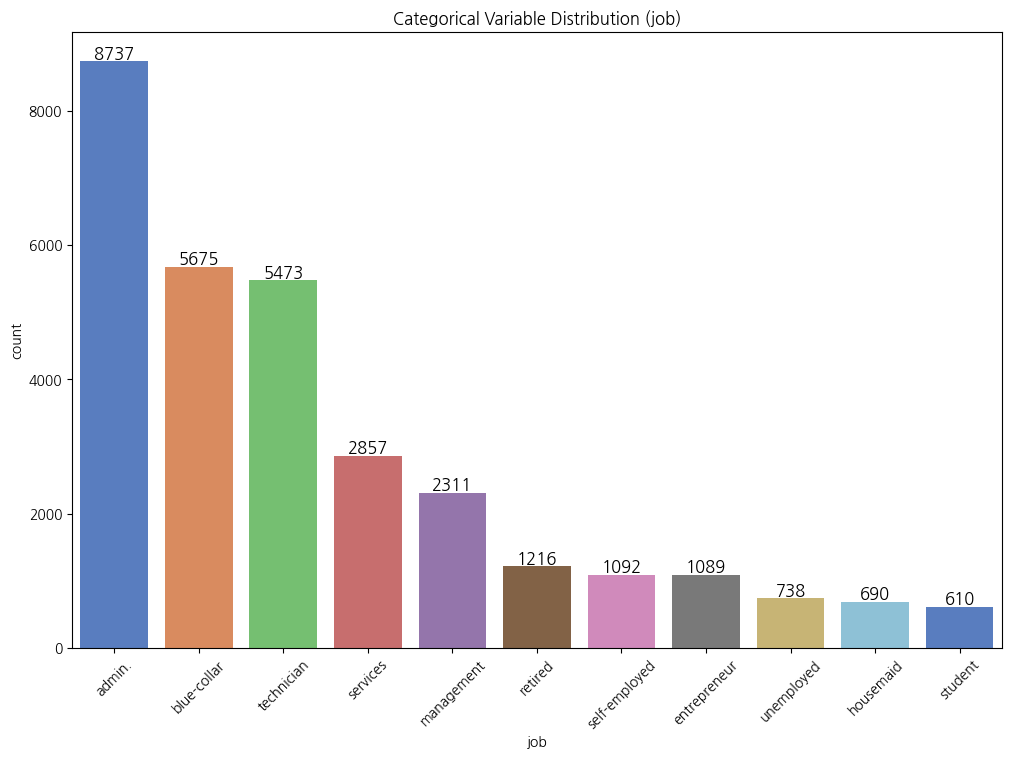

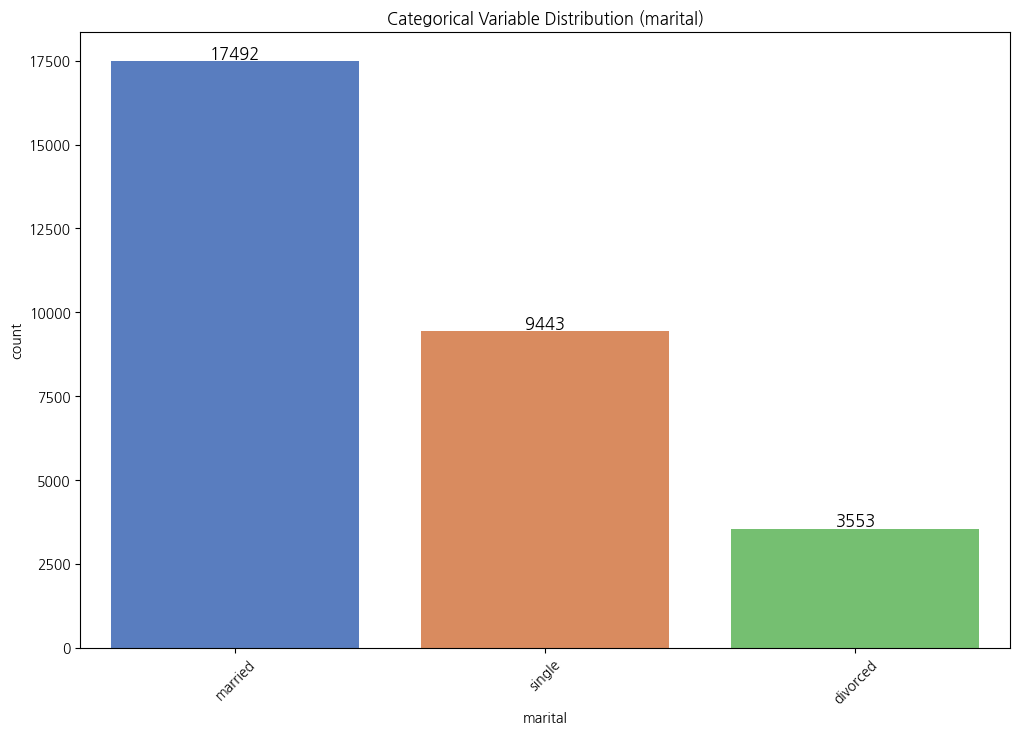

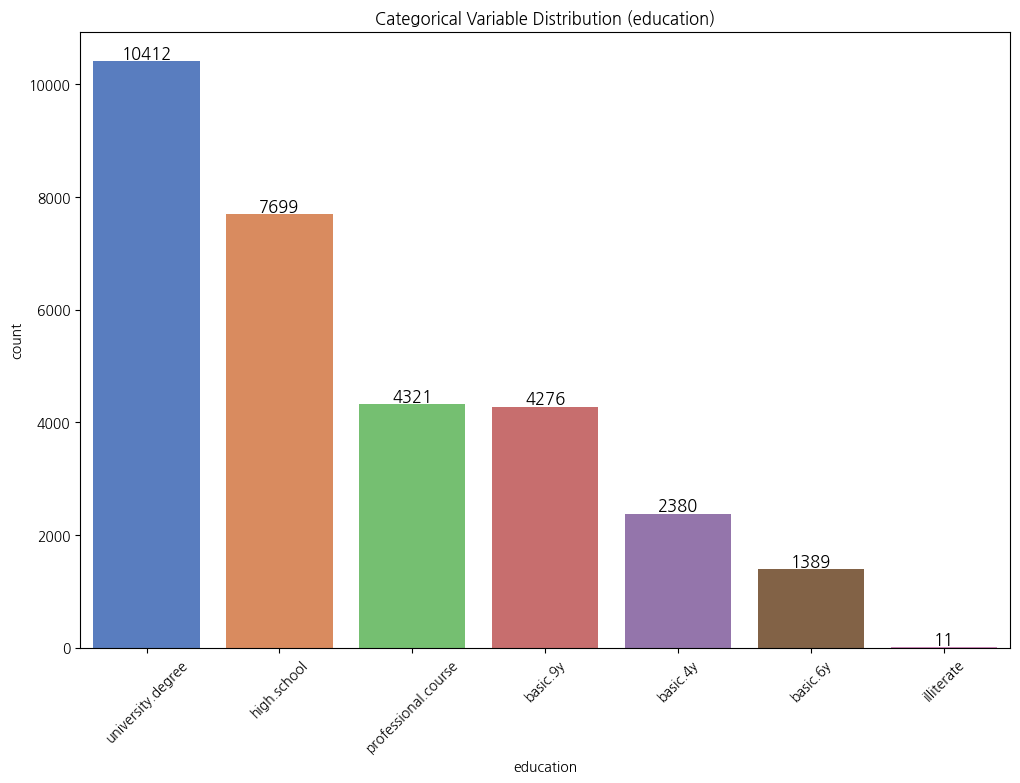

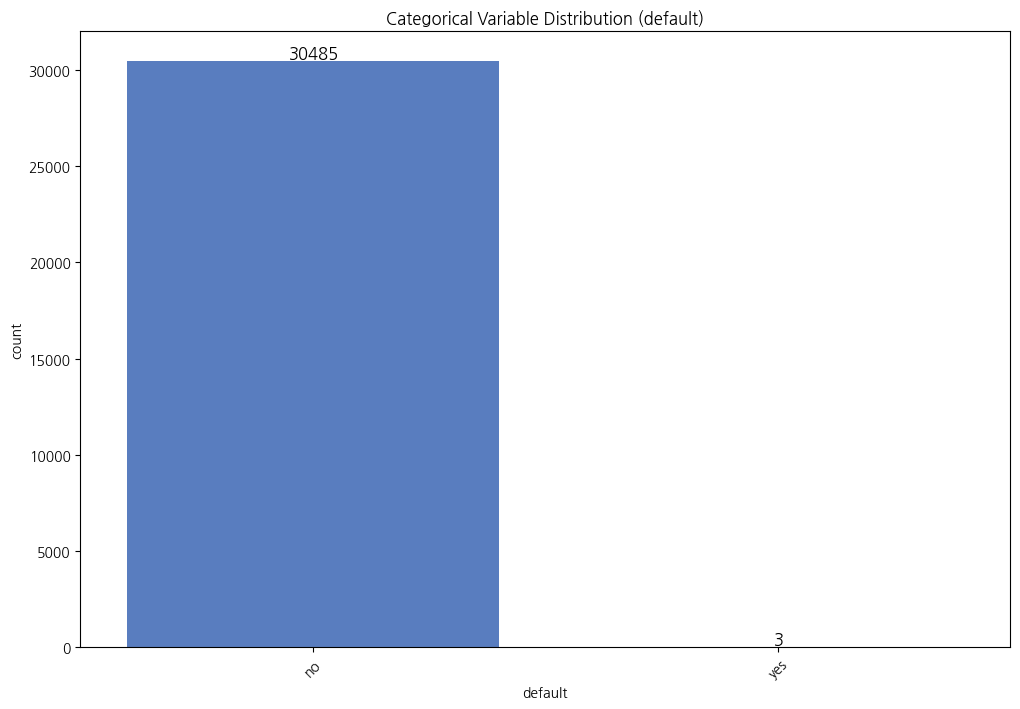

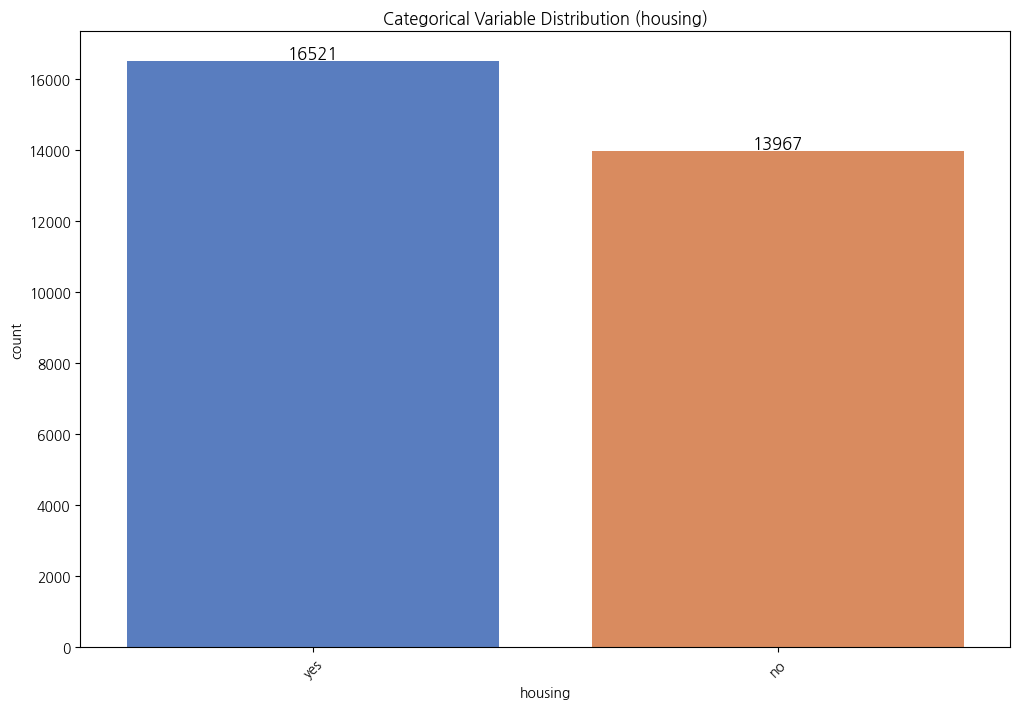

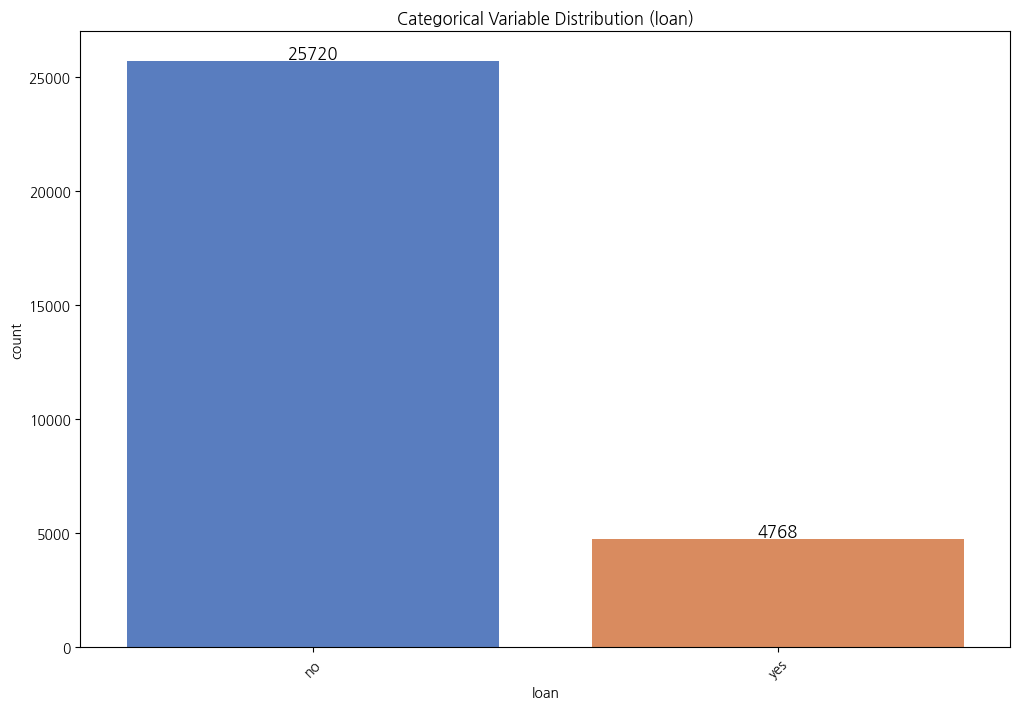

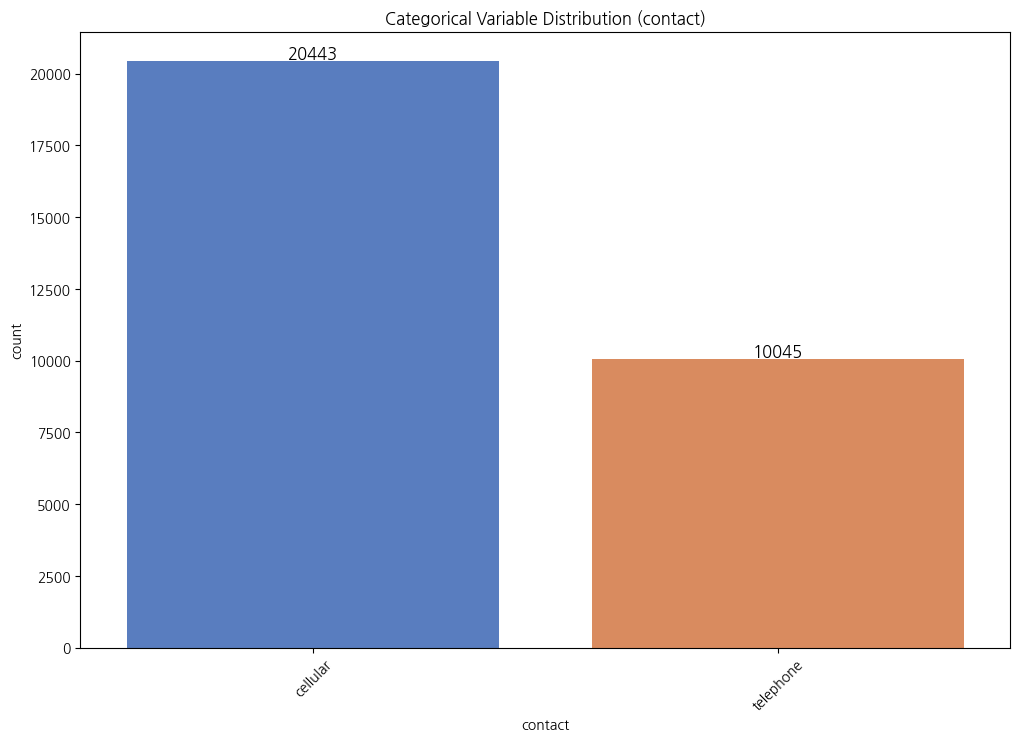

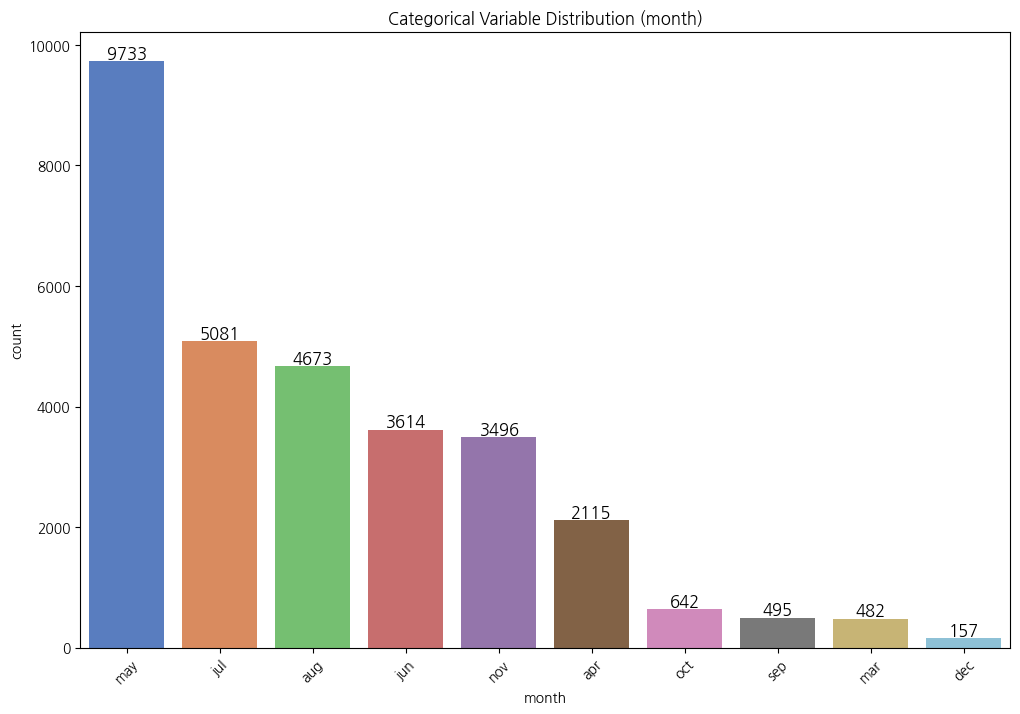

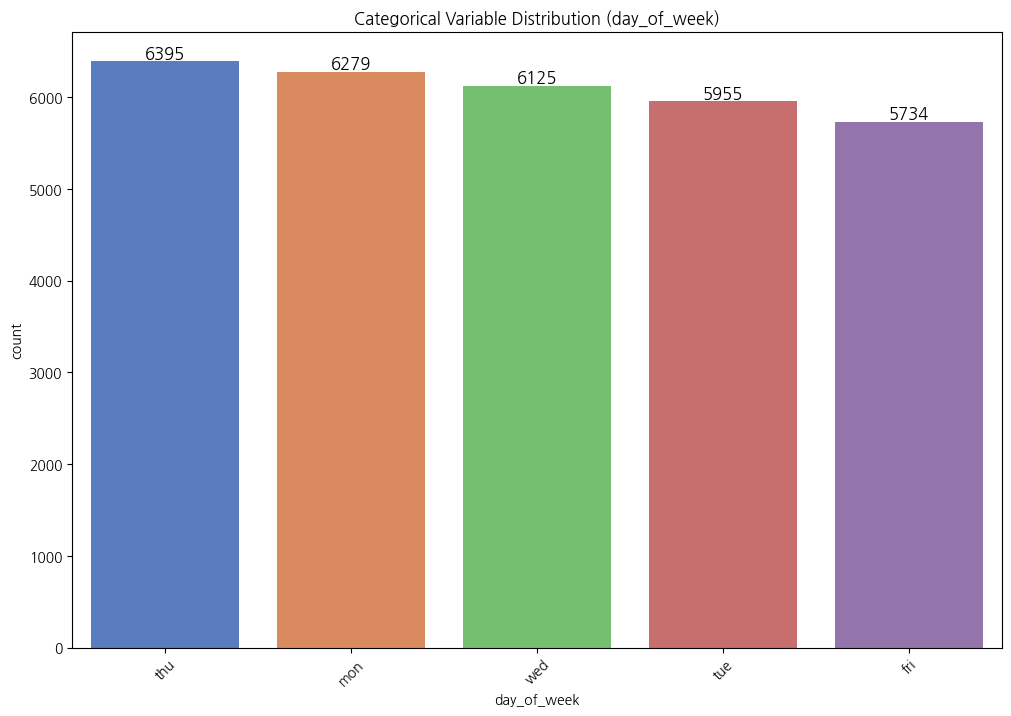

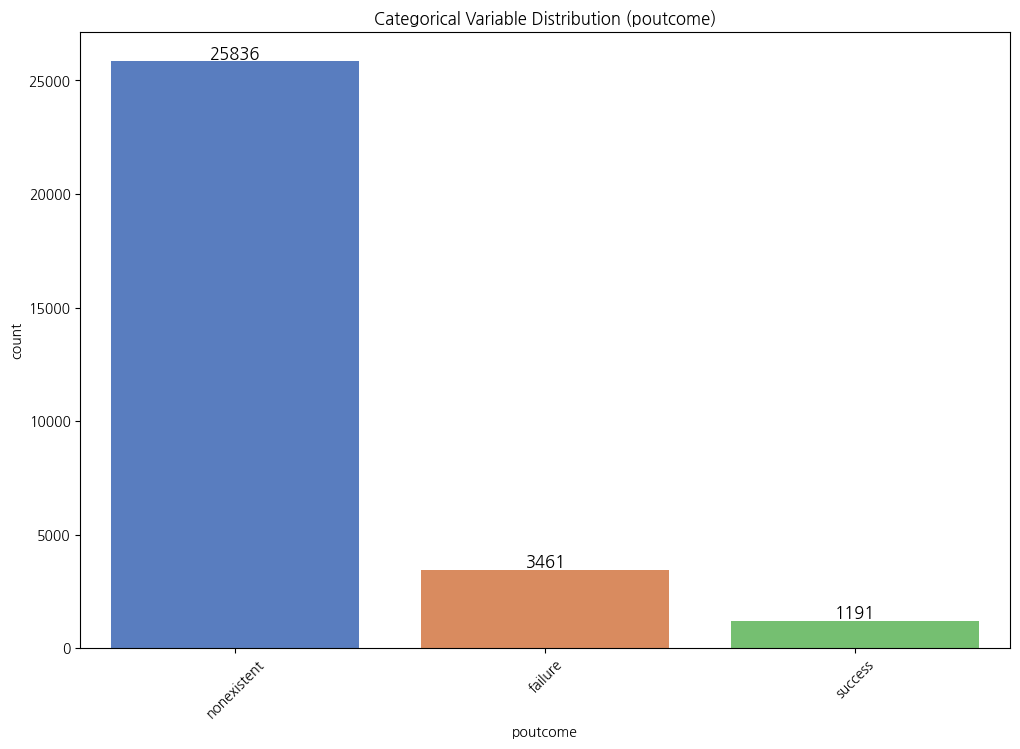

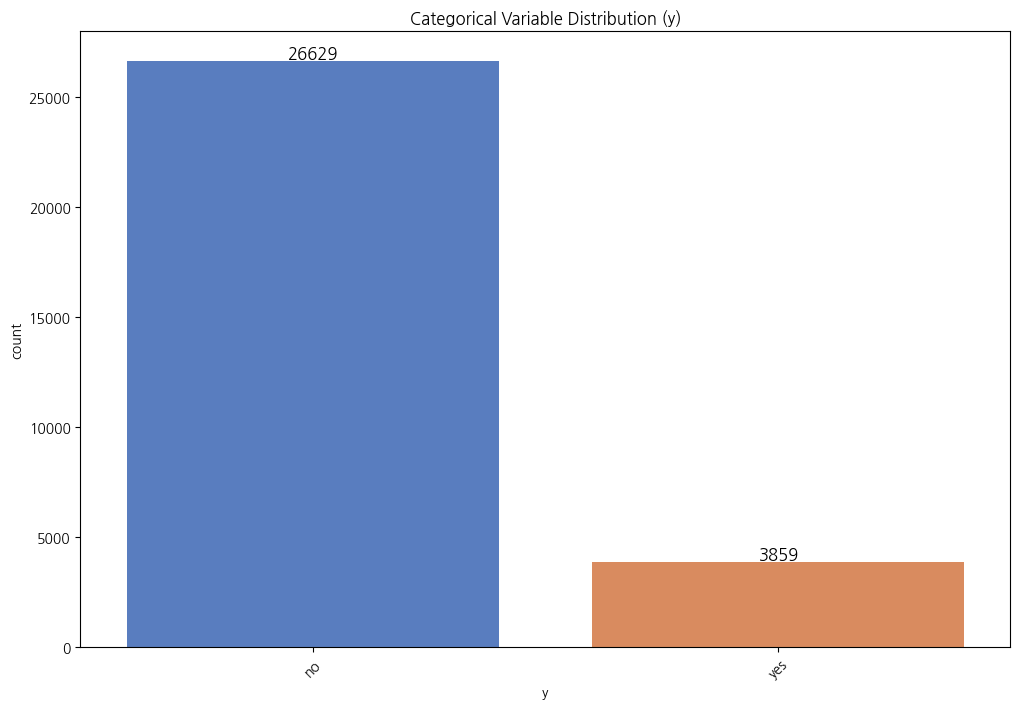

In [ ]:
# 범주형 데이터 컬럼 필터링
categorical_cols = df.select_dtypes(include=['object']).columns

# 범주형 데이터 분포 시각화
for col in categorical_cols:
    # barplot을 그리기 위한 범주형 데이터의 value_counts 계산 후 dataframe화
    value_counts_df = df[col].value_counts().reset_index()
    value_counts_df.columns = [col, 'count']

    # 그래프 크기 설정
    plt.figure(figsize=(12, 8))

    # barplot 생성
    ax = sns.barplot(data=value_counts_df, x=col, y='count', hue=col, palette='muted')

    # 막대 위에 수치(Label) 추가
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',  # 정수로 변환하여 표시
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # 위치 조정
                    ha='center', va='bottom', fontsize=12, color='black')

    # 그래프 x축 이름 값 회전 설정
    plt.xticks(rotation=45)

    # 그래프 제목 설정
    plt.title(f"Categorical Variable Distribution ({col})")

    # 그래프 출력
    plt.show()

## **수치 데이터 분포 및 이상치 확인**

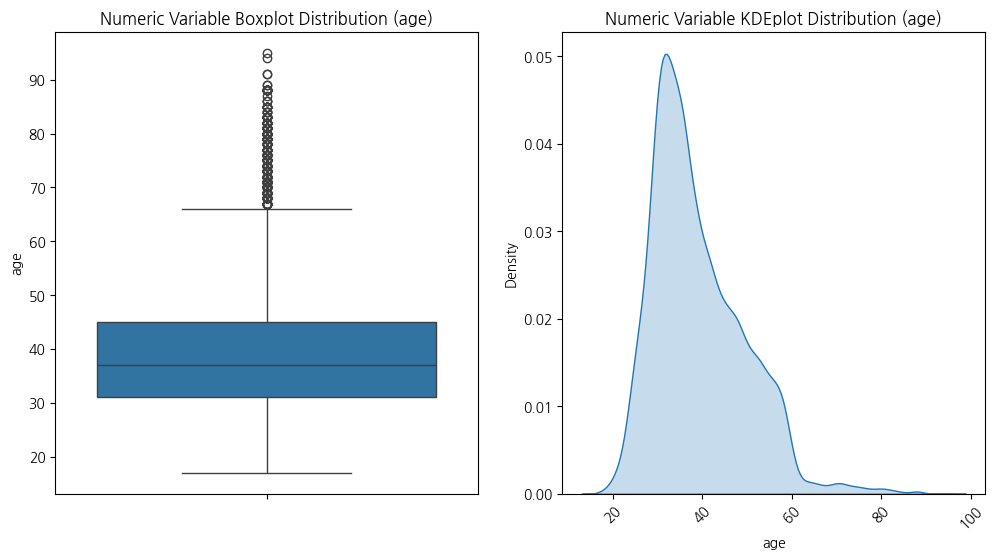

,age,count
71,17,2
62,18,15
58,19,21
41,20,47
39,21,84
...,...,...
56,88,22
70,89,2
72,91,2
75,94,1


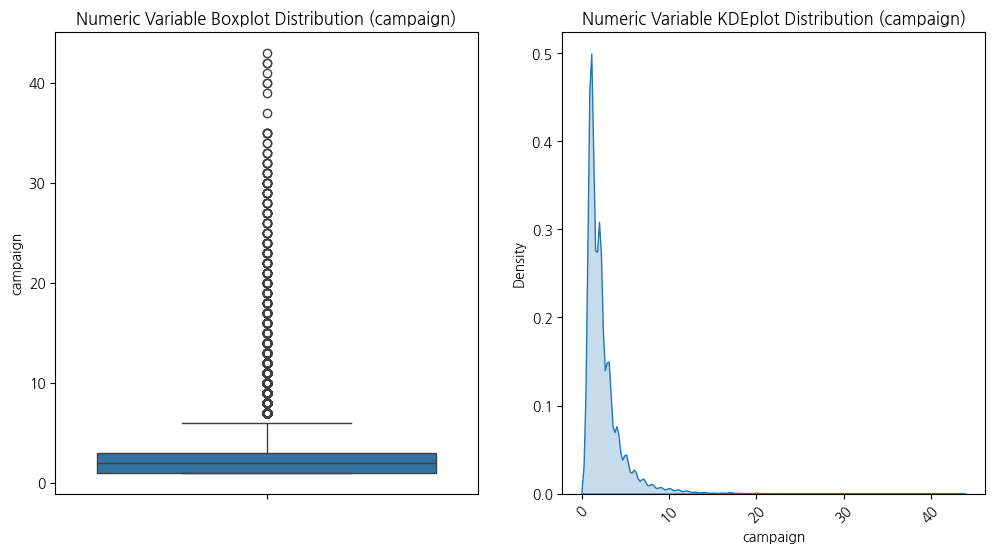

,campaign,count
0,1,13246
1,2,7873
2,3,3905
3,4,1937
4,5,1156
5,6,696
6,7,440
7,8,283
8,9,195
9,10,164


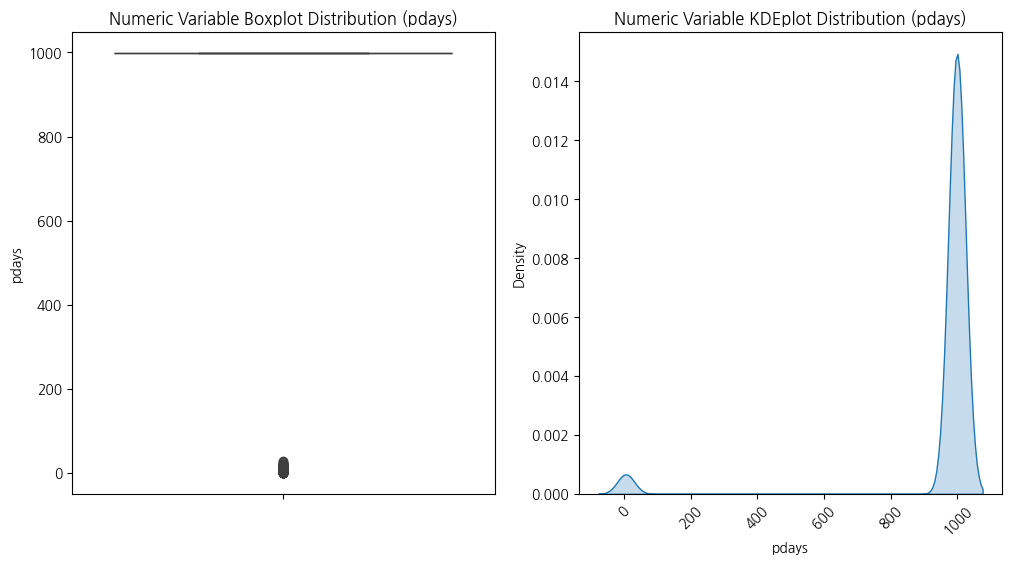

,pdays,count
15,0,14
13,1,21
5,2,53
1,3,381
3,4,102
8,5,43
2,6,363
7,7,50
16,8,13
4,9,53


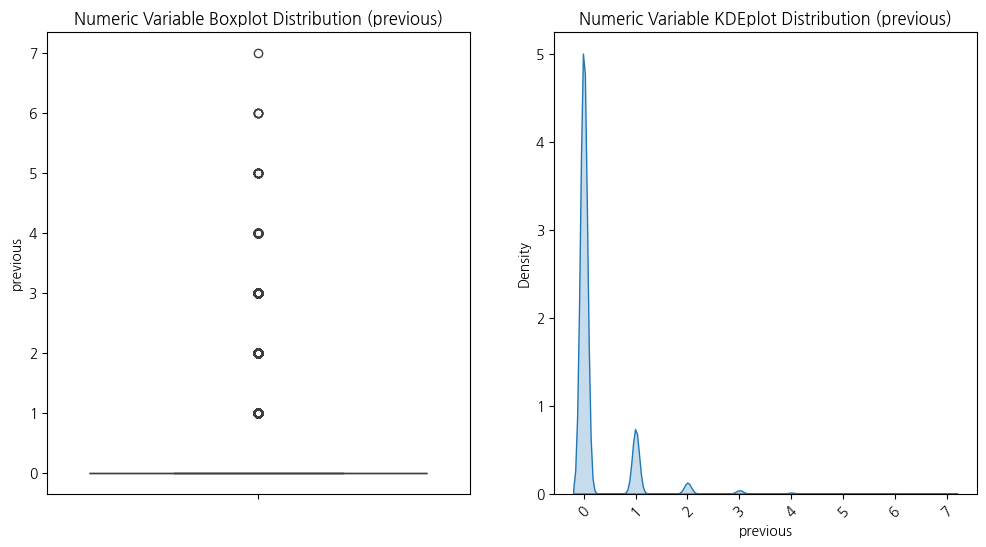

,previous,count
0,0,25836
1,1,3752
2,2,633
3,3,190
4,4,56
5,5,16
6,6,4
7,7,1


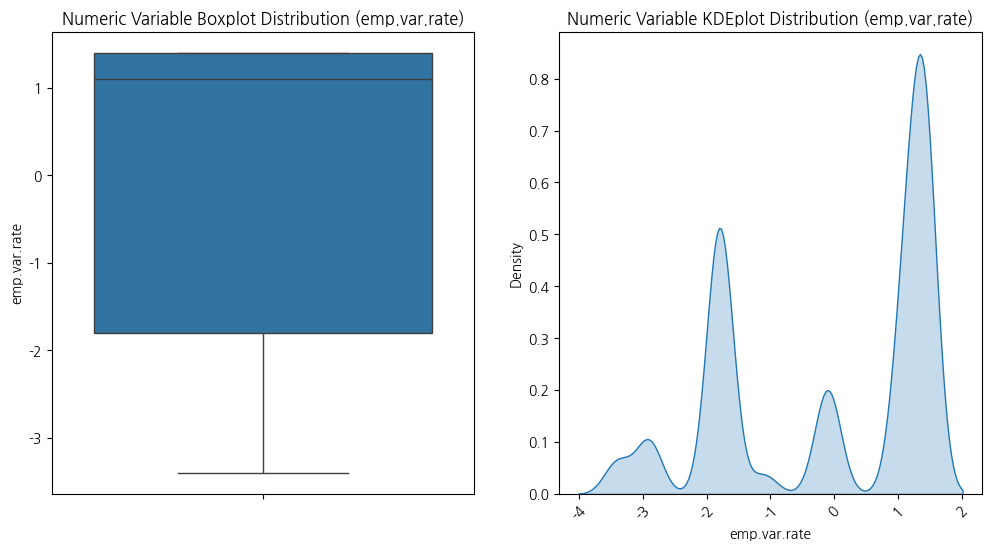

,emp.var.rate,count
5,-3.4,951
8,-3.0,147
4,-2.9,1461
1,-1.8,7392
6,-1.7,687
7,-1.1,565
9,-0.2,10
3,-0.1,3117
2,1.1,4938
0,1.4,11220


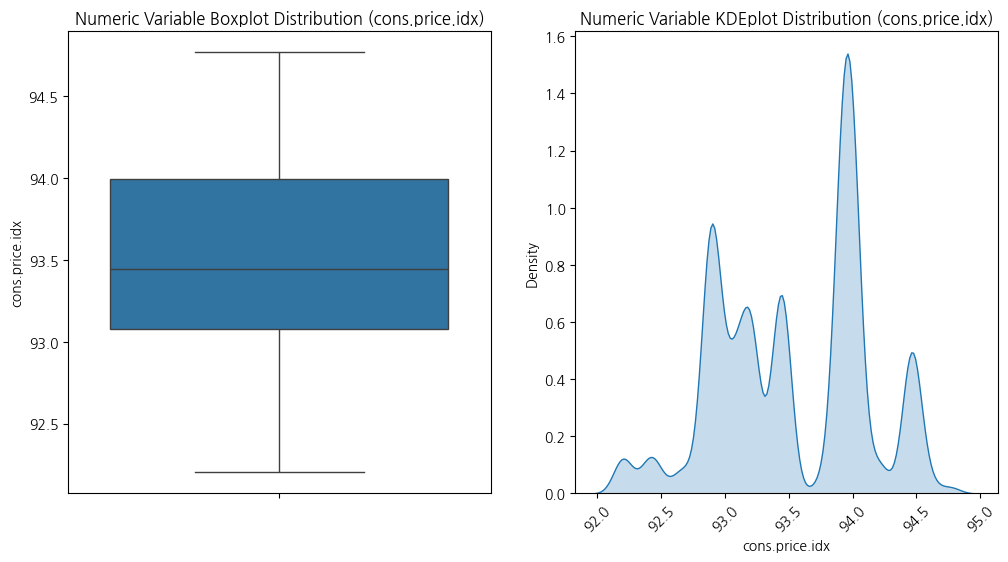

,cons.price.idx,count
7,92.201,676
14,92.379,229
9,92.431,396
20,92.469,157
10,92.649,326
21,92.713,147
25,92.756,10
13,92.843,261
2,92.893,4616
8,92.963,628


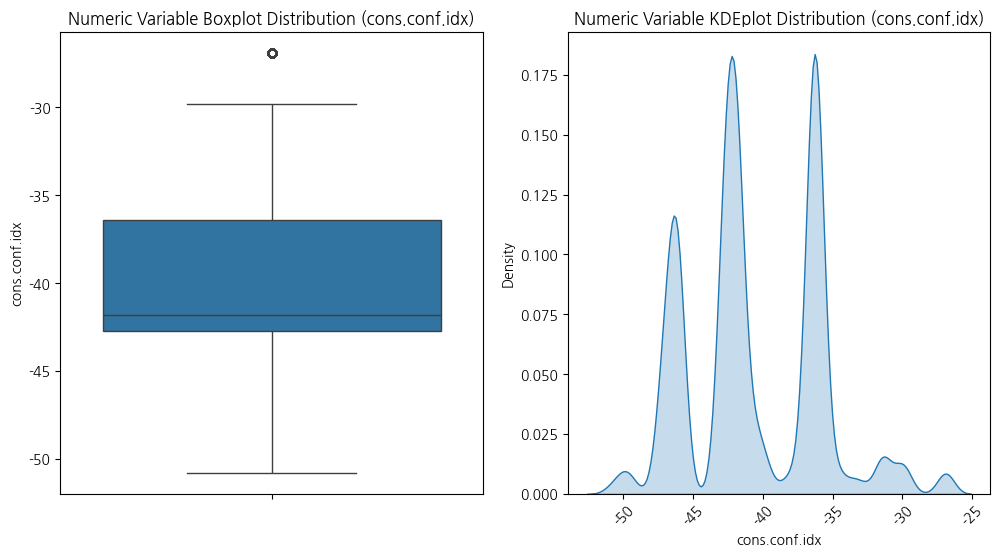

,cons.conf.idx,count
23,-50.8,116
13,-50.0,261
18,-49.5,183
6,-47.1,1970
2,-46.2,4616
25,-45.9,10
1,-42.7,4646
4,-42.0,3054
5,-41.8,2776
8,-40.8,628


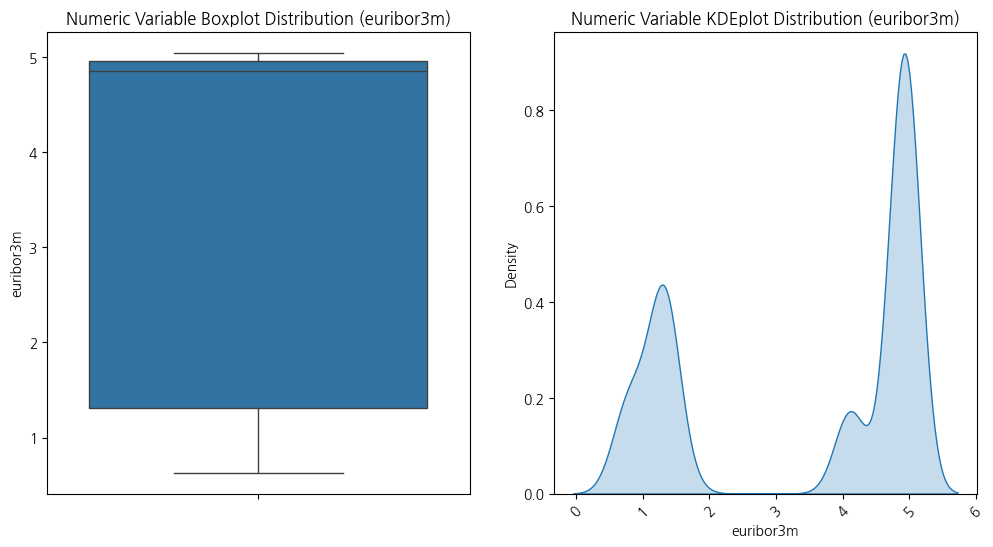

,euribor3m,count
217,0.634,8
87,0.635,31
179,0.636,11
287,0.637,3
249,0.638,6
...,...,...
26,4.967,417
8,4.968,713
44,4.970,119
253,5.000,6


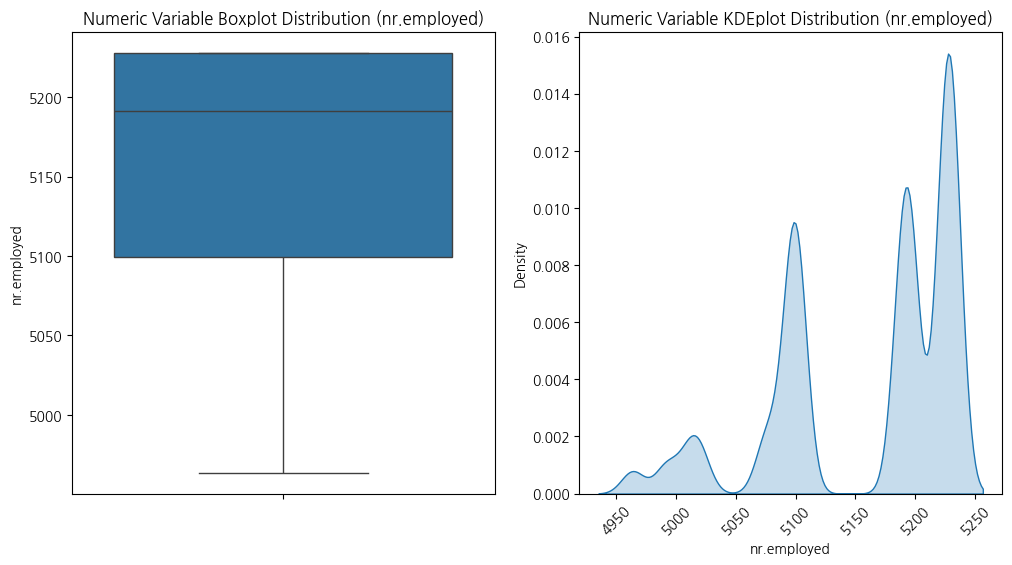

,nr.employed,count
7,4963.6,565
6,4991.6,687
8,5008.7,545
5,5017.5,951
9,5023.5,147
4,5076.2,1461
1,5099.1,6847
10,5176.3,10
2,5191.0,4938
3,5195.8,3117


In [ ]:
# 연속형 데이터 컬럼 필터링
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# 연속형 데이터 시각화
for col in numeric_cols:
    # boxplot과 kdeplot을 같이 그리기 위한 subplots 설정 (그래프 가로 배치)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # boxplot, kdeplot 생성
    sns.boxplot(data=df[col], ax=axes[0])
    sns.kdeplot(data=df[col], ax=axes[1], fill=True)

    # 그래프 x축 컬럼 값 회전 설정
    plt.xticks(rotation=45)

    # 그래프 별 제목 설정
    axes[0].set_title(f'Numeric Variable Boxplot Distribution ({col})')
    axes[1].set_title(f'Numeric Variable KDEplot Distribution ({col})')

    # 그래프 출력
    plt.show()

    display(df[col].value_counts().reset_index().sort_values(by=col, ascending=True))

## **원본 데이터프레임의 요약본 확인**

In [ ]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


범주형 데이터와 수치형 데이터를 분리하면 다음과 같다.

범주형 데이터

- `job` : 명목형
- `marital` : 명목형
- `education` : 명목형
- `default` : 명목형
- `housing` : 명목형
- `loan` : 명목형
- `contact` : 명목형
- `month` : 순서형
- `day_of_week` : 순서형
- `poutcome` : 명목형

수치형 데이터

- `age` : 연속형
- `campaign` : 이산형
- `pdays` : 연속형
- `previous` : 연속형
- `emp.var.rate` : 연속형
- `cons.price.idx` : 연속형
- `cons.conf.idx` : 연속형
- `euribor3m` : 연속형
- `nr.employed` : 이산형

## **소비자 신뢰지수 관련 데이터 시각화**

---

#### **소비자 신뢰지수란?**

- 소비자들이 경제 상황에 대해 얼마나 긍정적이거나 부정적인지를 나타내는 경제 지표
- 소비자들의 현재 및 미래 경제 전망, 개인 재정 상태, 고용 기회 등에 대한 설문조사를 기반으로 산출
- 포르투갈의 소비자 신뢰지수는 0을 기준으로 한다.
  - 0 초과: 소비자들이 경제를 긍정적으로 평가하며, 소비 지출이 증가할 가능성이 큼
  - 0 미만:  소비자들이경제를 부정적으로 평가하며, 소비를 줄일 가능성이 큼

#### **소비자 신뢰지수를 알면 좋은 점**

1. **경기 전망 예측**
   - 소비자가 경제를 낙관적으로 보면 소비가 늘어나 경제 성장에 긍정적 영향을 미침.
   - 반대로 신뢰지수가 낮으면 소비가 줄어들고 경제 침체 가능성이 높아짐.
2. **기업의 경영 전략 수립**
   - 소비자 신뢰가 높으면 기업은 적극적인 투자와 마케팅을 진행할 수 있음.
   - 신뢰지수가 낮으면 기업은 비용 절감 및 보수적ㅇ니 경영 전략을 취할 가능성이 큼.
3. **금융 시장 예측**
   - 소비 심리가 강하면 주식 시장에 긍정적인 영향을 주고, 반대의 경우 하락 요인이 될 수 있음.
   - 중앙은행이 금리 정책을 결정할 때 참고할 수 있음.
4. **정책 결정 참고 자료**
   - 정부가 경기 부약책(예: 금리 인하, 소비 촉진 정책)을 결정할 때 활용 가능.
5. **산업별 영향 예측**
   - 소비재, 여행, 자동차 등 소비자의 지출과 직결된 산업은 CCI 변화에 민감함.
   - 신뢰지수가 높으면 사치품 소비가 늘어나고, 낮으면 필수 소비재 중심으로 지출이 이동할 가능성이 큼.

In [ ]:
# 시각화 함수 생성
def create_cons_plt(data, col, title):
    groupby_df = data.groupby(col).agg(
        avg_truth = ('cons.conf.idx', 'mean')
    ).reset_index()

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=groupby_df, x=col, y='avg_truth', hue=col, palette='muted')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='top', fontsize=12, color='black')

    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid()
    plt.show()

### **교육 수준별**

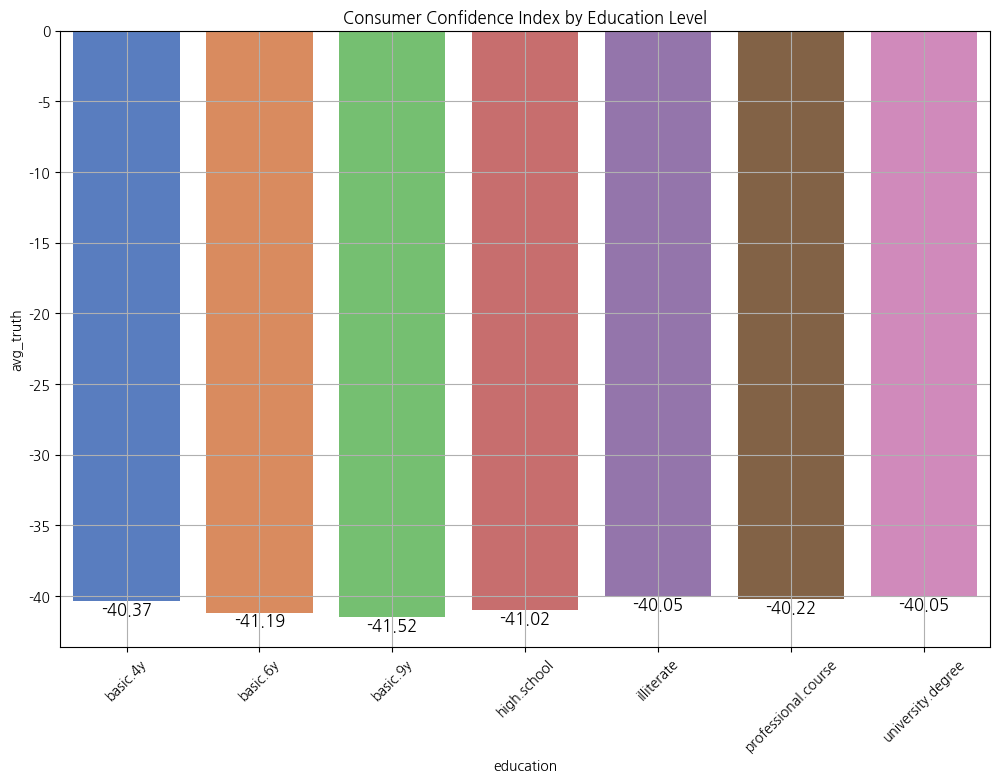

In [ ]:
create_cons_plt(df, 'education', 'Consumer Confidence Index by Education Level')

### **직업별**

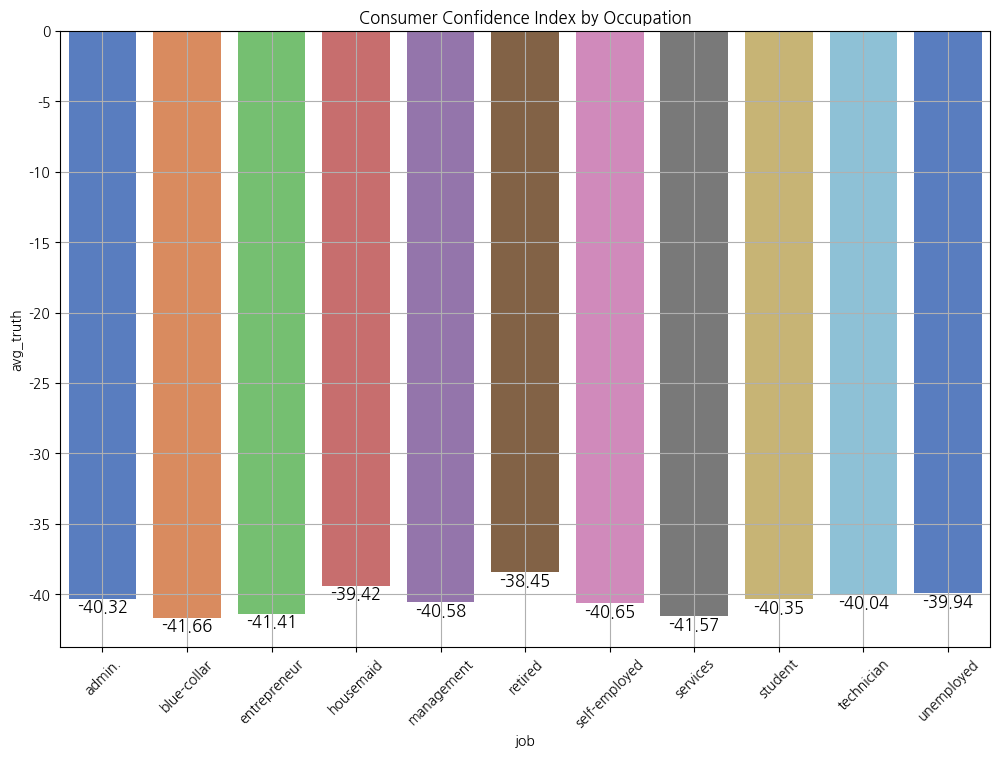

In [ ]:
create_cons_plt(df, 'job', 'Consumer Confidence Index by Occupation')

### **나이대별**

In [ ]:
age_range_df = pd.DataFrame({
    'age_range': (df['age'] // 10) * 10,
    'cons.conf.idx' : df['cons.conf.idx']
})
display(age_range_df)

,age_range,cons.conf.idx
0,50,-36.4
2,30,-36.4
3,40,-36.4
4,50,-36.4
6,50,-36.4
...,...,...
41183,70,-50.8
41184,40,-50.8
41185,50,-50.8
41186,40,-50.8


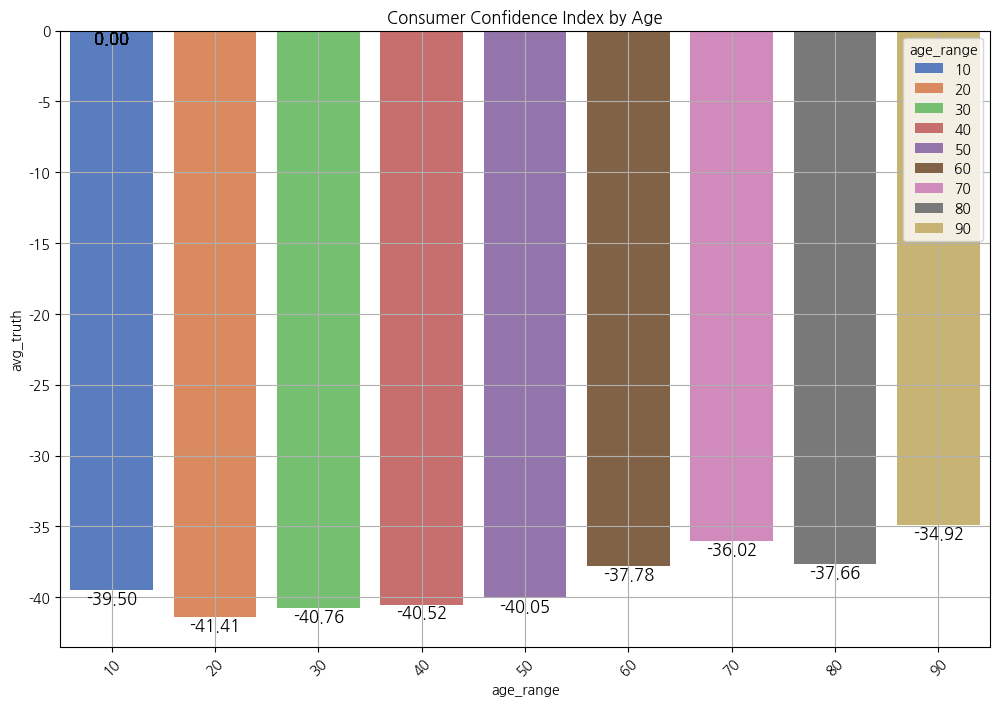

In [ ]:
create_cons_plt(age_range_df, 'age_range', 'Consumer Confidence Index by Age')

## **3개월 유리보 금리 관련 데이터 시각화**

#### **Euribor(유리보)란?**

- Euribor(Euro Interbank Offered Rate): 유럽의 주요 은행들이 서로 단기 대출을 할 떄 적용하는 금리
- 유로존에서 단기 금리의 기준이 되며, 유럽 중앙은행(ECB)의 정책에 따라 변동
- 다양한 기간(1주, 1개월, 3개월, 6개월, 12개월 등) 단위로 발표됨

#### **3개월 유리보 금리의 특징**

- 3개월 만기의 대출에 적용되는 Euribor 금리
- 일반적으로 단기 대출, 대출 이자율, 금융 상품(예: 변동금리 대출, 모기지)의 기준 금리로 사용
- 경제 상황(인플레이션, ECB 기준금리 변화)에 따라 변동

#### **어디에 활용되는가?**

- 은행 대출 및 모기지(주택담보대출)
- 기업 대출
- 파생상품 및 금융시장

#### **3개월 유리보 금리가 중요한 이유**

- 유럽 경제의 건강 상태를 반영
- 유동성 및 신용위험을 평가하는 지표
- ECB의 통화정책이 어떻게 반영되는지 알 수 있음

In [ ]:
# 시각화 함수 생성
def create_euribor_plt(data, col, title):
    groupby_df = data.groupby(col).agg(
        euribor_mean = ('euribor3m', 'mean')
    ).reset_index()

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=groupby_df, x=col, y='euribor_mean', hue=col, palette='muted')

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid()
    plt.show()

### **교육 수준별**

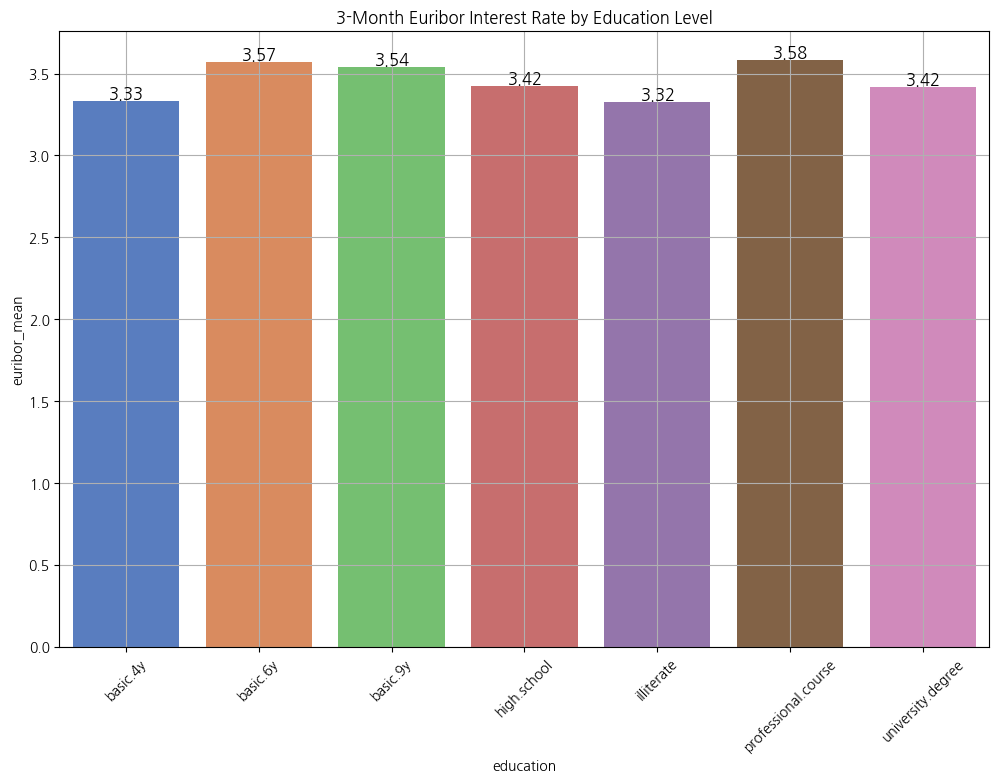

In [ ]:
create_euribor_plt(df, 'education', '3-Month Euribor Interest Rate by Education Level')

### **직업별**

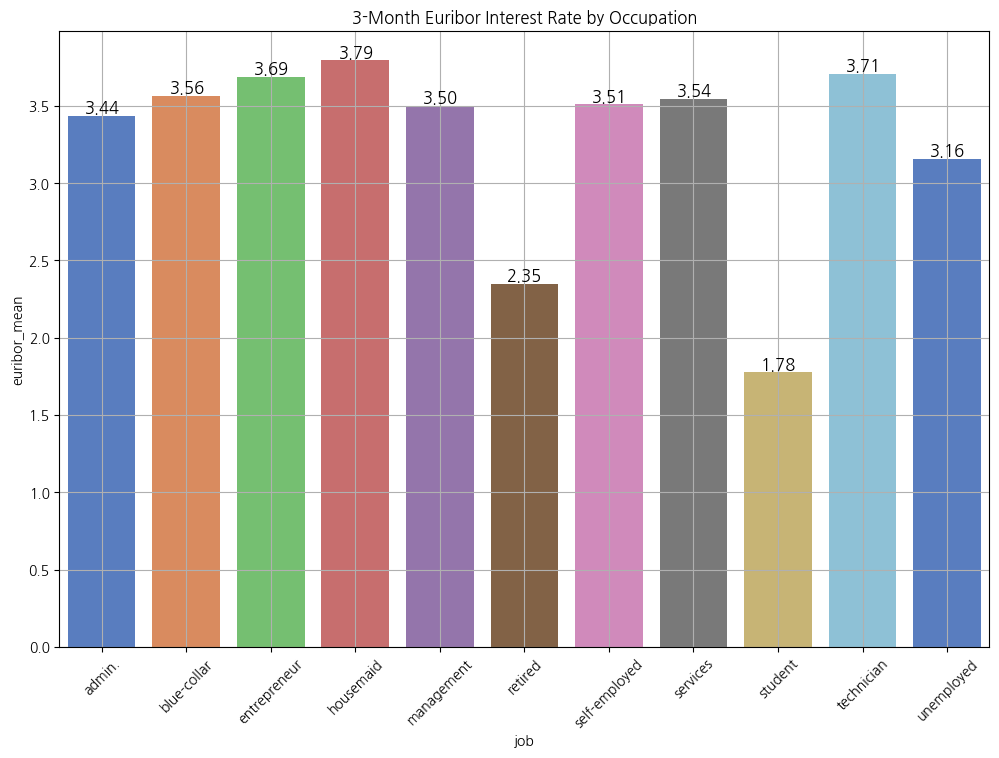

In [ ]:
create_euribor_plt(df, 'job', '3-Month Euribor Interest Rate by Occupation')

### **나이대별**

In [ ]:
age_range_df = pd.DataFrame({
    'age_range': (df['age'] // 10) * 10,
    'euribor3m' : df['euribor3m']
})
display(age_range_df)

,age_range,euribor3m
0,50,4.857
2,30,4.857
3,40,4.857
4,50,4.857
6,50,4.857
...,...,...
41183,70,1.028
41184,40,1.028
41185,50,1.028
41186,40,1.028


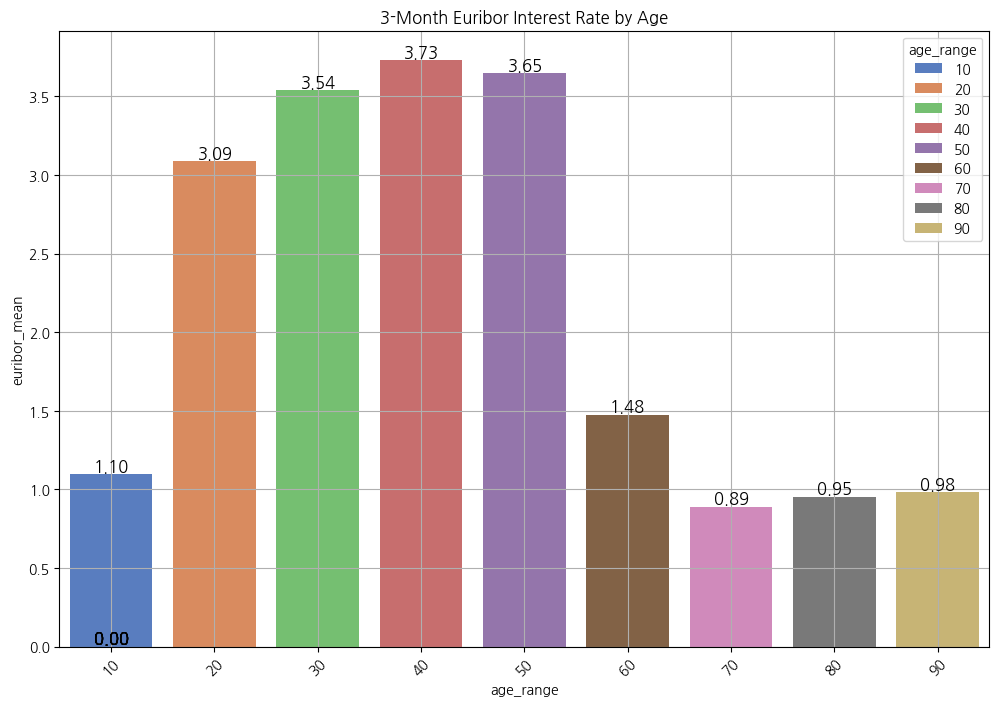

In [ ]:
create_euribor_plt(age_range_df, 'age_range', '3-Month Euribor Interest Rate by Age')

## **정기 예금 가입 여부 관련 데이터 시각화**

In [ ]:
# 시각화 함수 생성
def create_y_plt(data, col, title):
    groupby_df = data.groupby(col).agg(
        yes = ('y', lambda x: (x =='yes').sum()),
        no = ('y', lambda x: (x =='no').sum())
    ).reset_index()

    melted_df = pd.melt(groupby_df, id_vars=[col], value_vars=['yes', 'no'],
                         var_name='Response', value_name='Count')

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=melted_df, x=col, y='Count', hue='Response', palette='muted')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.xticks(rotation=45)
    plt.title(title)
    plt.grid()
    plt.show()

### **교육 수준별**

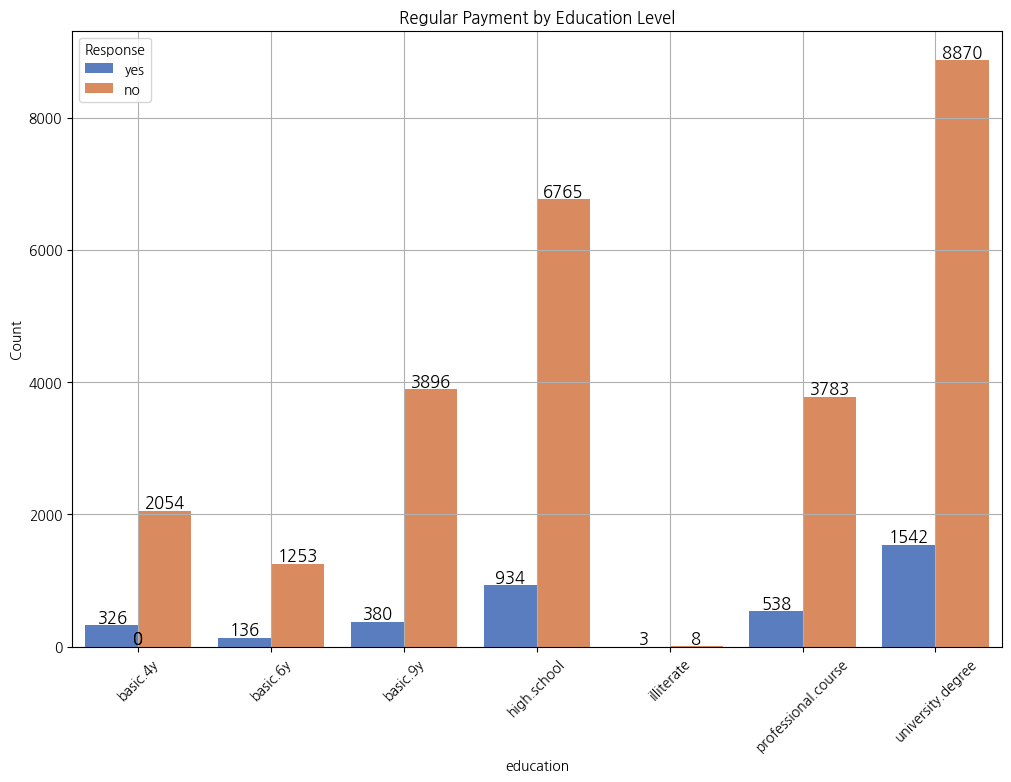

In [ ]:
create_y_plt(df, 'education', 'Regular Payment by Education Level')

### **직업별**

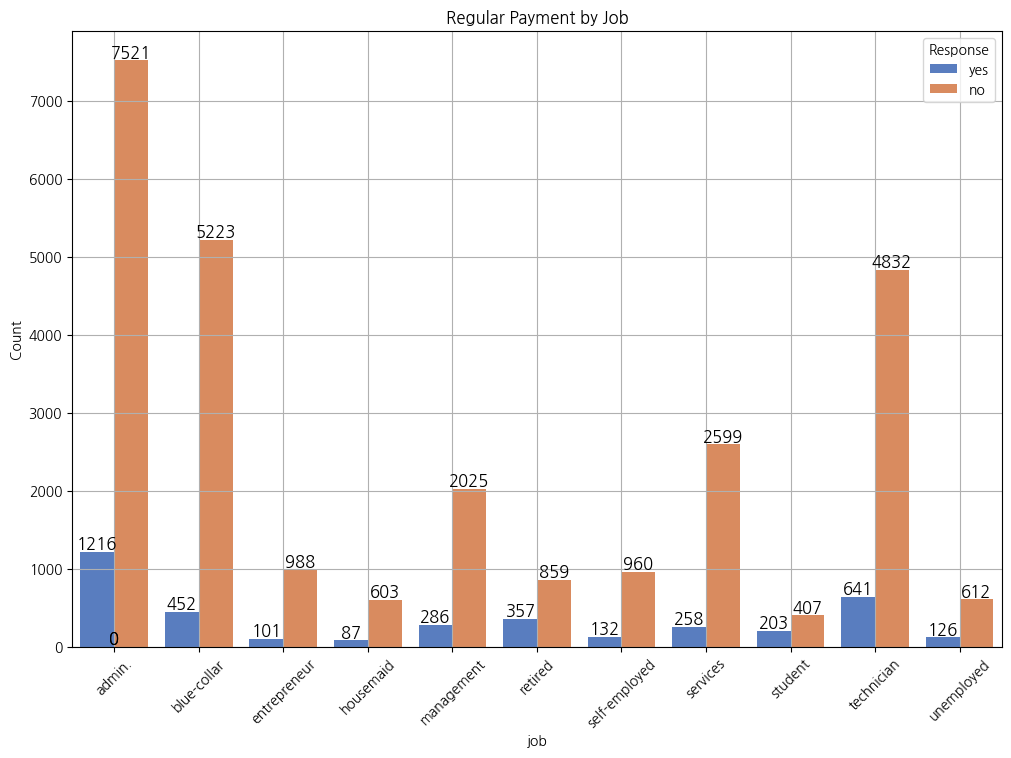

In [ ]:
create_y_plt(df, 'job', 'Regular Payment by Job')

### **직업별**

In [ ]:
age_range_df = pd.DataFrame({
    'age_range': (df['age'] // 10) * 10,
    'y' : df['y']
})
display(age_range_df)

,age_range,y
0,50,no
2,30,no
3,40,no
4,50,no
6,50,no
...,...,...
41183,70,yes
41184,40,no
41185,50,no
41186,40,yes


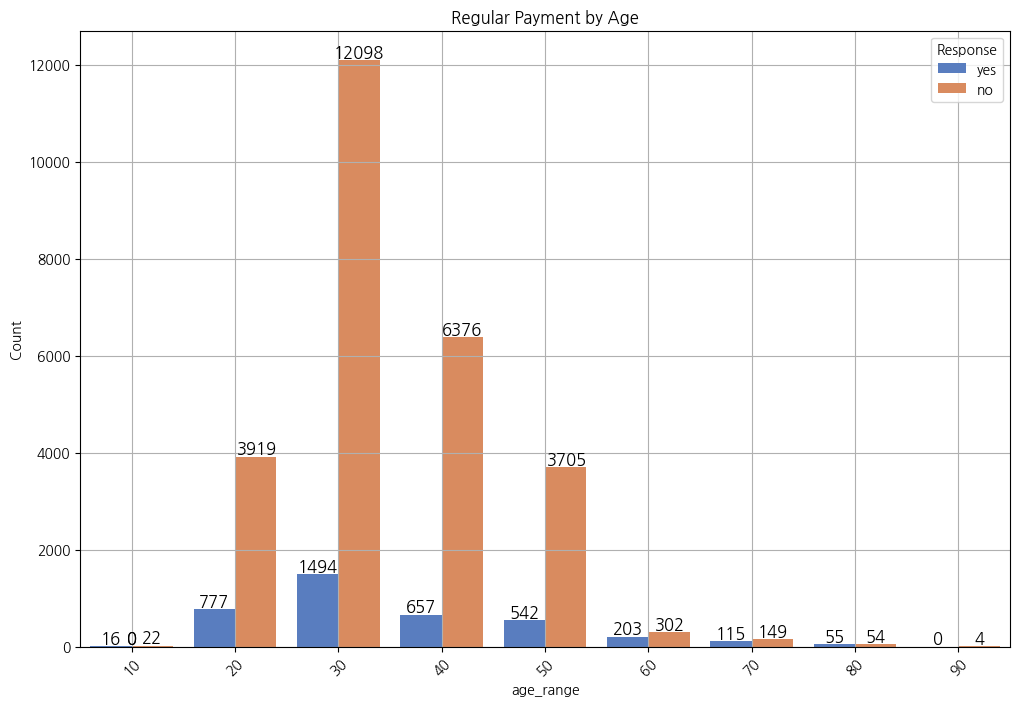

In [ ]:
create_y_plt(age_range_df, 'age_range', 'Regular Payment by Age')

## **범주형 변수 간의 카이제곱을 통한 상관관계 시각화**

In [ ]:
# 카이제곱 함수 생성
def chi_square_test(df, cols):
    # 결과를 담을 리스트 생성
    results = []

    # 컬럼들을 모두 교차하며 카이제곱 검정 실시
    for col1, col2 in itertools.combinations(cols, 2):
        contigency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contigency_table)
        results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'Chi2 Statistic': chi2,
            'p-value': p
        })

    return pd.DataFrame(results)

In [ ]:
# 카이제곱 검정 실행
chi_square_results = chi_square_test(df, categorical_cols)

# 유의한 관계가 있는 변수만 출력
print(chi_square_results.shape)
display(chi_square_results[chi_square_results['p-value'] < 0.05])

(55, 4)


,Variable 1,Variable 2,Chi2 Statistic,p-value
0,job,marital,2632.731334,0.000000e+00
1,job,education,27170.190881,0.000000e+00
4,job,loan,23.832837,8.056670e-03
5,job,contact,355.931551,2.194807e-70
6,job,month,3439.844830,0.000000e+00
7,job,day_of_week,63.235141,1.104738e-02
8,job,poutcome,576.098426,3.097345e-109
9,job,y,730.223863,2.033137e-150
10,marital,education,1130.228326,1.817146e-234
14,marital,contact,145.864105,2.118420e-32


## **연속형 변수 간의 피어슨 상관계수를 통한 상관관계 시각화**

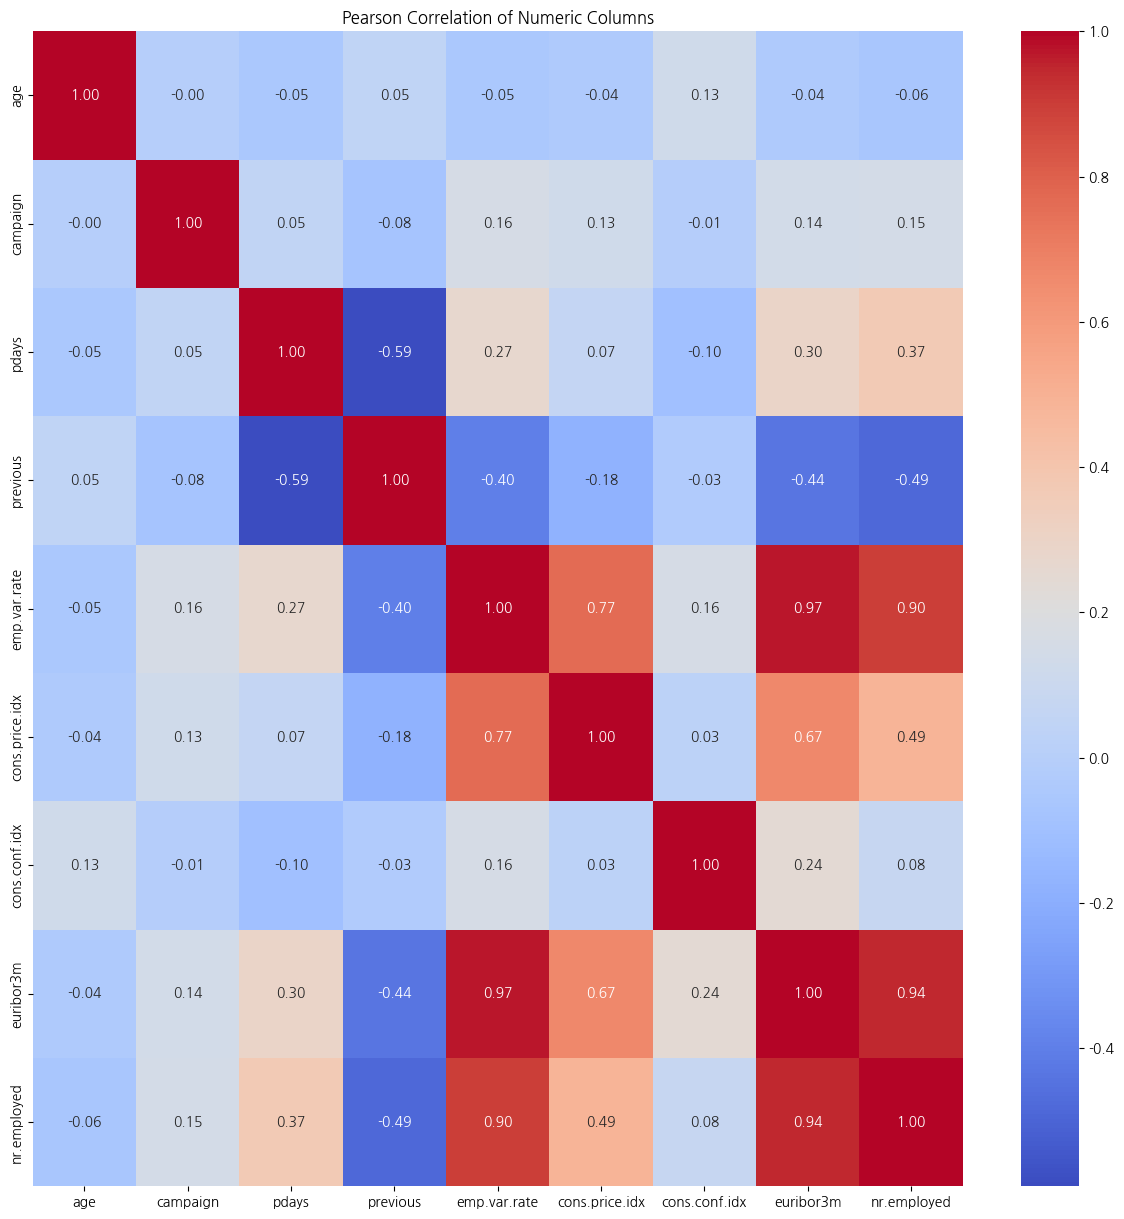

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation of Numeric Columns')
plt.show()

피어슨 상관계수가 높다고 평가하는 기준은 그 절댓값이 0.3 이상인 값을 일반적으로 많이 지정한다.

다음은 상관관계가 높게 나타나는 부분만 heatmap으로 출력한 결과이다.

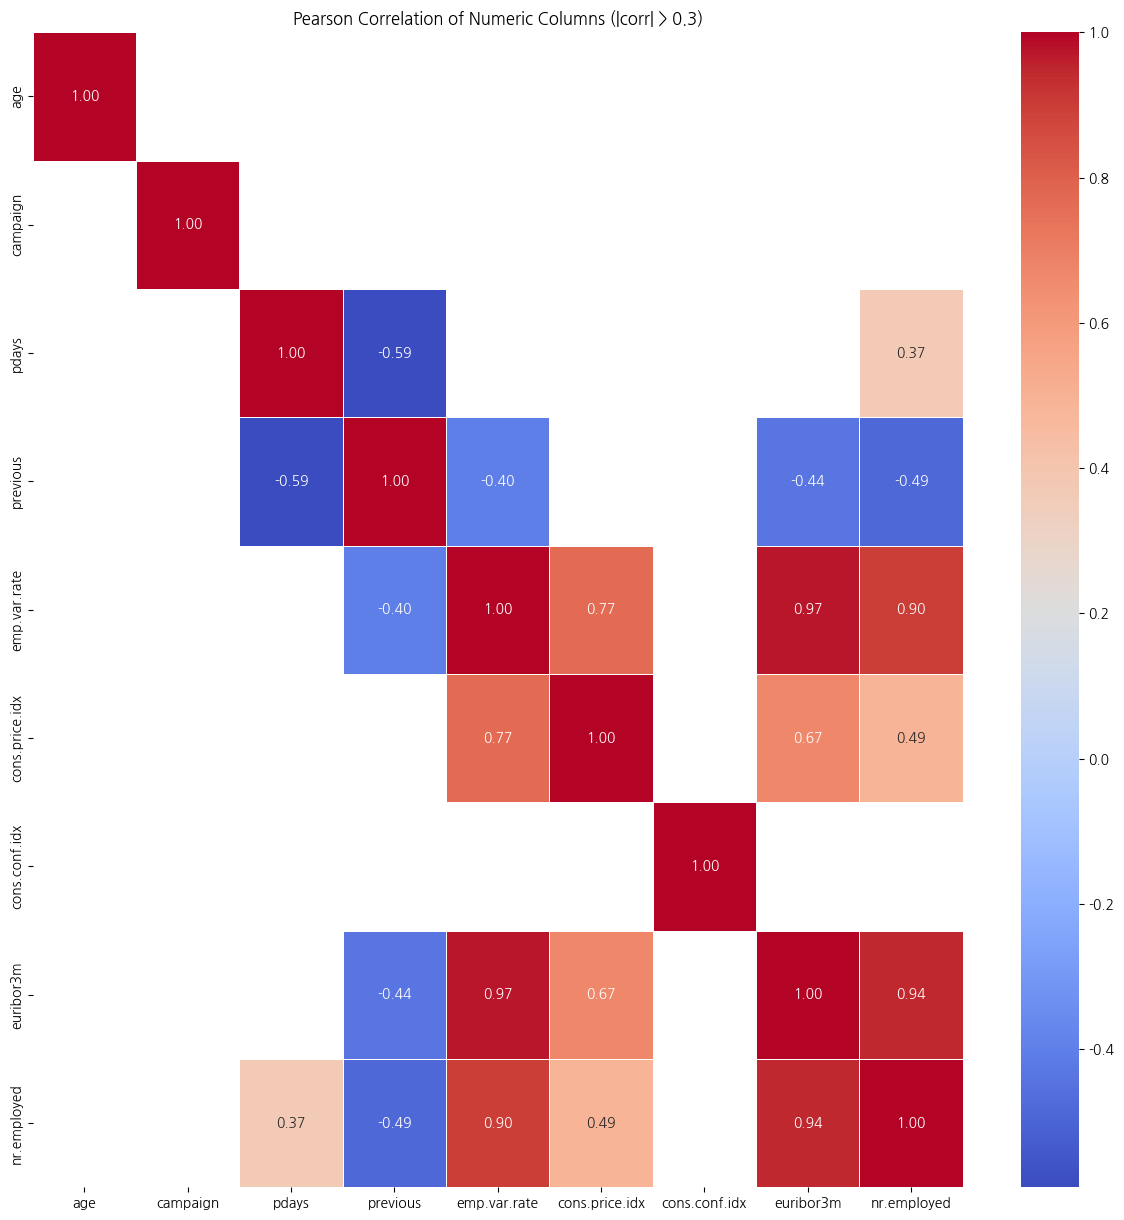

In [ ]:
plt.figure(figsize=(15, 15))

# 상관 행렬 계산
corr_matrix = df[numeric_cols].corr()

# 0.3 이상의 절댓값을 가지는 부분만 남기고 나머지는 NaN 처리
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]

# 히트맵 출력
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=filtered_corr.isna())

plt.title('Pearson Correlation of Numeric Columns (|corr| > 0.3)')
plt.show()

## **EDA 분석 인사이트**

---

#### **소비자 신뢰지수 관련**

- 교육 수준별 상관없이 전체적으로 소비자 신뢰지수가 -40대에 웃돌고 있음.
- 직장을 가지지 않은 인원의 소비자 신뢰지수는 임금이 없기에 신뢰지수가 낮을 수 있지만, 직장이 있는 인원의 소비자 신뢰지수는 이보다 더 낮은 수치를 기록하고 있다.
- 나이대별 소비자 신뢰지수는 소비 활동이 왕성한 20대와 30대가 최저점에 위치하고 있다. 이는 소비 활동에 대해 비관적인 시각을 가지고 있다고 이야기 할 수 있다.

#### **유리보 관련**

3개월 유리보 금리는 경제 상황과 금리 수준에 따라 다르지만, 일반적으로 다음과 같이 판단한다.
- 2% 이하 → 낮은 금리
- 2% ~ 3% → 중간 수준
- 3% ~ 4% → 높은 금리
- 4% 이상 → 매우 높은 금리

시각화를 통해 알 수 있는 점은 다음과 같다.
- 교육 수준별 금리는 대체적으로 3%에 분포하고 있다. 즉, 높은 금리를 가지고 있음.
- 직장을 가지지 않은 인원의 금리는 낮으나, 직장이 있는 인원의 금리는 높은 축에 속해 있다.
- 나이대별 금리는 대다수 직장을 가지고 있는 20대 ~ 40대 사이에서 많은 금리를 보유하고 있다.

#### **정기 결제 여부 관련**

전체적으로 많은 사람들이 정기 결제에 참여하지 않았다.

- 교육 수준별 금리는 대체적으로 3%에 분포하고 있다. 즉, 높은 금리를 가지고 있음.
- 직장을 가지지 않은 인원의 금리는 낮으나, 직장이 있는 인원의 금리는 높은 축에 속해 있다.
- 나이대별 금리는 대다수 직장을 가지고 있는 20대 ~ 40대 사이에서 많은 금리를 보유하고 있다.

#### **범주형 변수 간 상관관계 관련**

- 대부분의 범주형 변수가 담긴 컬럼들이 연관성을 가지고 있는 것으로 확인 되었다.

#### **연속형 변수 간 상관관계 관련**

- 상관관계가 높은 값들만 따로 출력해서 확인한 결과, 캠페인, 고용, 경졔관련 지수 내용들이 상관성을 크게 가지는 것으로 나타났다.

# **모델링**

---

## **모델링 하기 전 유의사항**

- 데이터의 이상치가 많이 분포하지만, 각 컬럼들의 특성상 삭제할 수 없는 데이터들이 다수 존재하고 다른 변수를 이용할 시 데이터의 오류가 생길 수 있다고 생각하여 이상치 처리를 진행하지 않았다.
- 선형 분류 분석시, 이상치에 민감하게 반응하여 분석 모델링에 큰 차질을 줄 것으로 예상하여 결정 트리 모델로 진행하는 것으로 결정하였다.

## **모델링 전 데이터 전처리**

- 각 범주형 데이터들을 라벨링 처리하여 수치화하였다.

In [ ]:
# 데이터 라벨링 형식으로 바꿈
# 원본 유지
encoded_df = df.copy()

# month와 day_of_week는 월과 요일에 맞는 수치로 바꿔줌
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7
}

encoded_df['month'] = df['month'].map(month_mapping)
encoded_df['day_of_week'] = df['day_of_week'].map(day_mapping)

# sklearn을 사용하지 않고 labeling 하는 코드
filtered_cols = encoded_df.select_dtypes(include='object').columns
encoded_df[filtered_cols] = encoded_df[filtered_cols].astype('category').apply(lambda x: x.cat.codes)

# 데이터 확인
display(encoded_df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,5,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,11,5,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,11,5,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


- `pdays` 컬럼 내용을 변환하여 숫자간의 의미와 특성을 반영하였다.

In [ ]:
# pdays 값을 변환
# 999는 연락을 하지 않았다는 컬럼값
# 1자리 숫자는 연락을 했다는 것
# pdays에 각 +1을 적용하고 pdays가 1000인 값은 0으로 바꿔 숫자간의 척도와 특성을 반영
# 숫자가 0 : 연락 안힘 / 숫자가 0보다 큼 : 연락함
encoded_df['pdays'] = encoded_df['pdays'] + 1
encoded_df['pdays'] = encoded_df['pdays'].replace(1000, 0)

# 데이터 확인
display(encoded_df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,5,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,5,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,5,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,5,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,5,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,11,5,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,11,5,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,1,0,0,11,5,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,11,5,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


## **train_test_split**

In [ ]:
# feature와 target 변수 선언
X = encoded_df.drop(labels='y', axis=1)
y = encoded_df['y']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **모델 선언 및 훈련**

In [ ]:
# 그리드 서치 모델 선언 및 훈련 함수
def select_fit_grid_model(kind, feature, target, handle=True):
    # 모델을 선택하고, 하이퍼파라미터 그리드를 반환하는 함수
    def select_model(kind):
        models = {
            'RF': (RandomForestClassifier(random_state=42), {
                'n_estimators': [100, 200, 300],
                'max_depth': [5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'class_weight': ['balanced', None]
            }),
            'AD': (AdaBoostClassifier(random_state=42), {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1]
            }),
            'GB': (GradientBoostingClassifier(random_state=42), {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'subsample': [0.8, 0.9, 1.0]
            }),
            'XGB': (xgb.XGBClassifier(random_state=42), {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7],
                'colsample_bytree': [0.8, 0.9, 1.0],
                'scale_pos_weight': [target.value_counts()[0] / target.value_counts()[1], 1]
            }),
            'LGBM': (LGBMClassifier(random_state=42), {
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.05, 0.1],
                'num_leaves': [20, 30, 40],
                'subsample': [0.8, 0.9, 1.0],
                'class_weight': ['balanced', None]
            })
        }
        return models.get(kind, (None, None))

    # 핸들링 옵션
    if handle:
        model, param = select_model(kind)
        if model is None:
            print('None Model Return')
            return None

    # 그리드 서치 수행
    grid_model = GridSearchCV(
        model,
        param,
        cv=5,
        n_jobs=-1,
        scoring='f1',
        error_score='raise')
    grid_model.fit(feature, target)

    # 최적의 하이퍼파라미터 및 점수 출력
    print(f'Best Parameters: {grid_model.best_params_}')
    print(f'Best Score: {grid_model.best_score_}')

    return grid_model

출력된 그리드 서치 모델의 변수 중요도를 시각화하는 함수도 작성하였다.

In [ ]:
def feature_importances_plt(model, train, title):
    best_model = model.best_estimator_
    importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature' : train.columns,
        'Importance' : importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(15, 8))
    sns.barplot(data=feature_importance_df, x='Feature', y='Importance', hue='Feature', palette='muted')
    plt.xticks(rotation=45)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(title)
    plt.show()

### **RandomForest**

In [ ]:
rf_model = select_fit_grid_model('RF', X_train, y_train)

y_pred = rf_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.516245171205836
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7974
           1       0.44      0.62      0.52      1173

    accuracy                           0.85      9147
   macro avg       0.69      0.75      0.71      9147
weighted avg       0.88      0.85      0.86      9147



RandomForest의 Feature Importace 출력 그래프

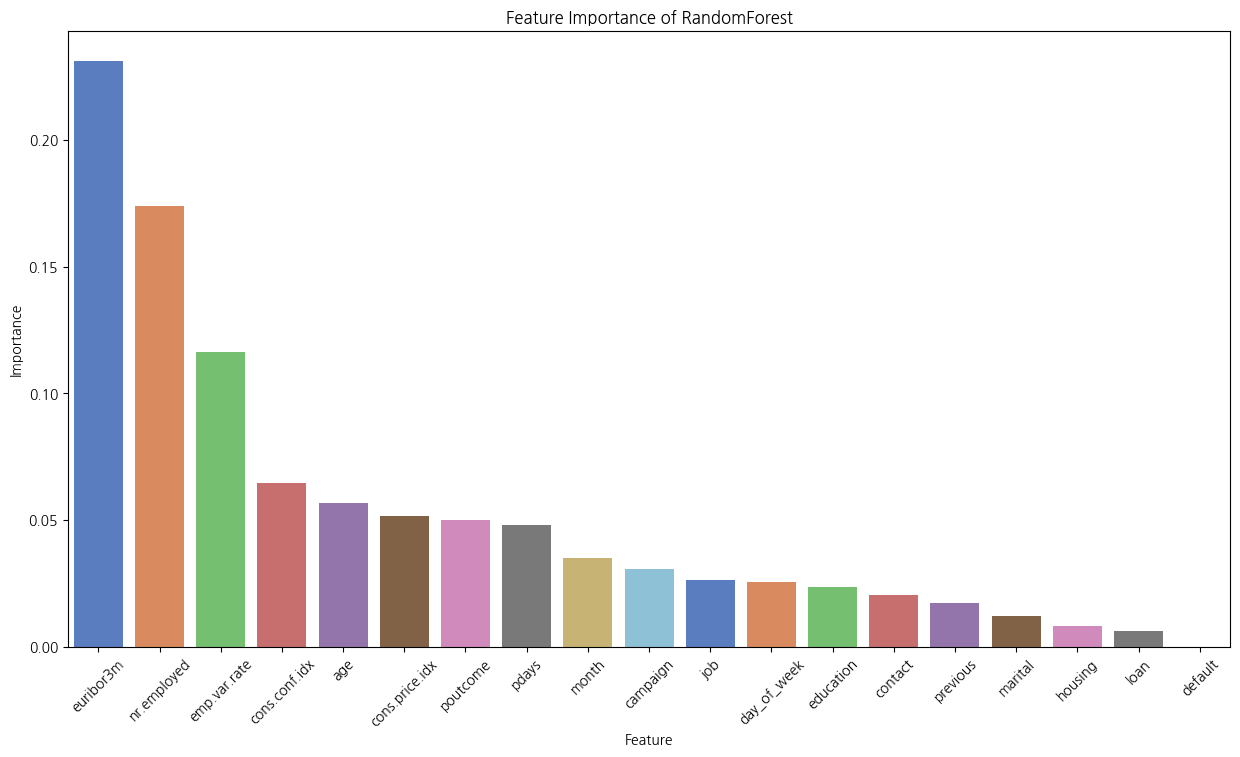

In [ ]:
feature_importances_plt(rf_model, X_train, 'Feature Importance of RandomForest')

### **AdaBoost**

In [ ]:
ad_model = select_fit_grid_model('AD', X_train, y_train)

y_pred = ad_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best Score: 0.29778356255103994
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7974
           1       0.70      0.17      0.28      1173

    accuracy                           0.88      9147
   macro avg       0.80      0.58      0.61      9147
weighted avg       0.87      0.88      0.85      9147



AdaBoost의 Feature Importace 출력 그래프

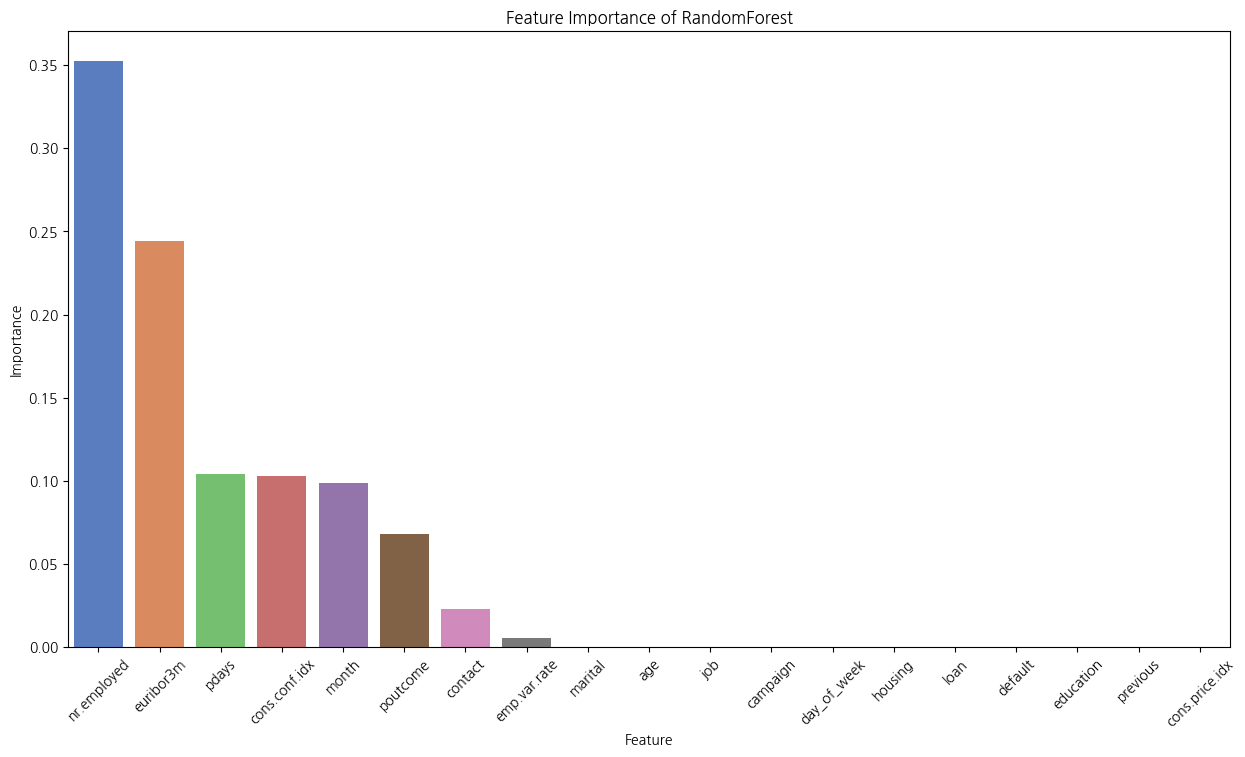

In [ ]:
feature_importances_plt(ad_model, X_train, 'Feature Importance of RandomForest')

### **GradientBoosting**

In [ ]:
gb_model = select_fit_grid_model('GB', X_train, y_train)

y_pred = gb_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Score: 0.41257530177396856
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7974
           1       0.59      0.31      0.40      1173

    accuracy                           0.88      9147
   macro avg       0.75      0.64      0.67      9147
weighted avg       0.86      0.88      0.87      9147



GradientBoosting의 Feature Importace 출력 그래프

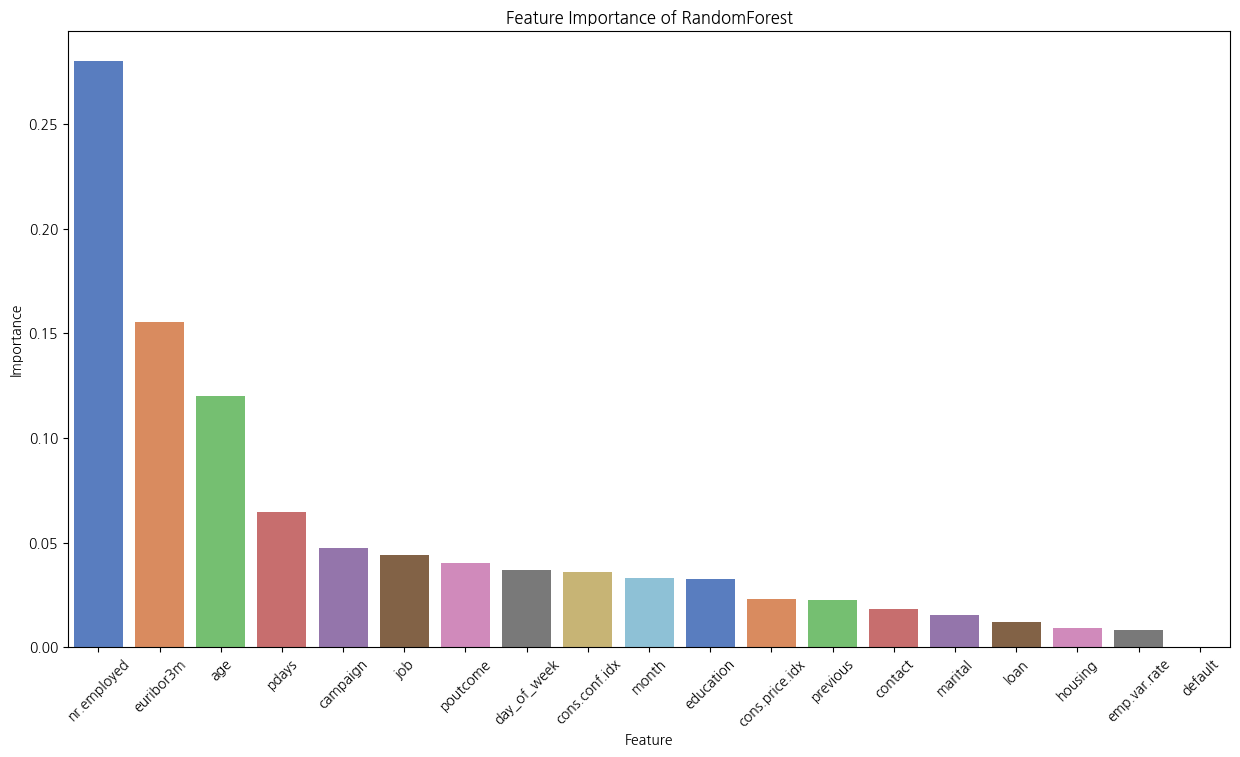

In [ ]:
feature_importances_plt(gb_model, X_train, 'Feature Importance of RandomForest')

### **XGBoost**

In [ ]:
xgb_model = select_fit_grid_model('XGB', X_train, y_train)

y_pred = xgb_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': np.float64(6.945271779597915)}
Best Score: 0.5069448117593149
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7974
           1       0.43      0.61      0.51      1173

    accuracy                           0.85      9147
   macro avg       0.69      0.75      0.71      9147
weighted avg       0.87      0.85      0.86      9147



XGBoost의 Feature Importace 출력 그래프

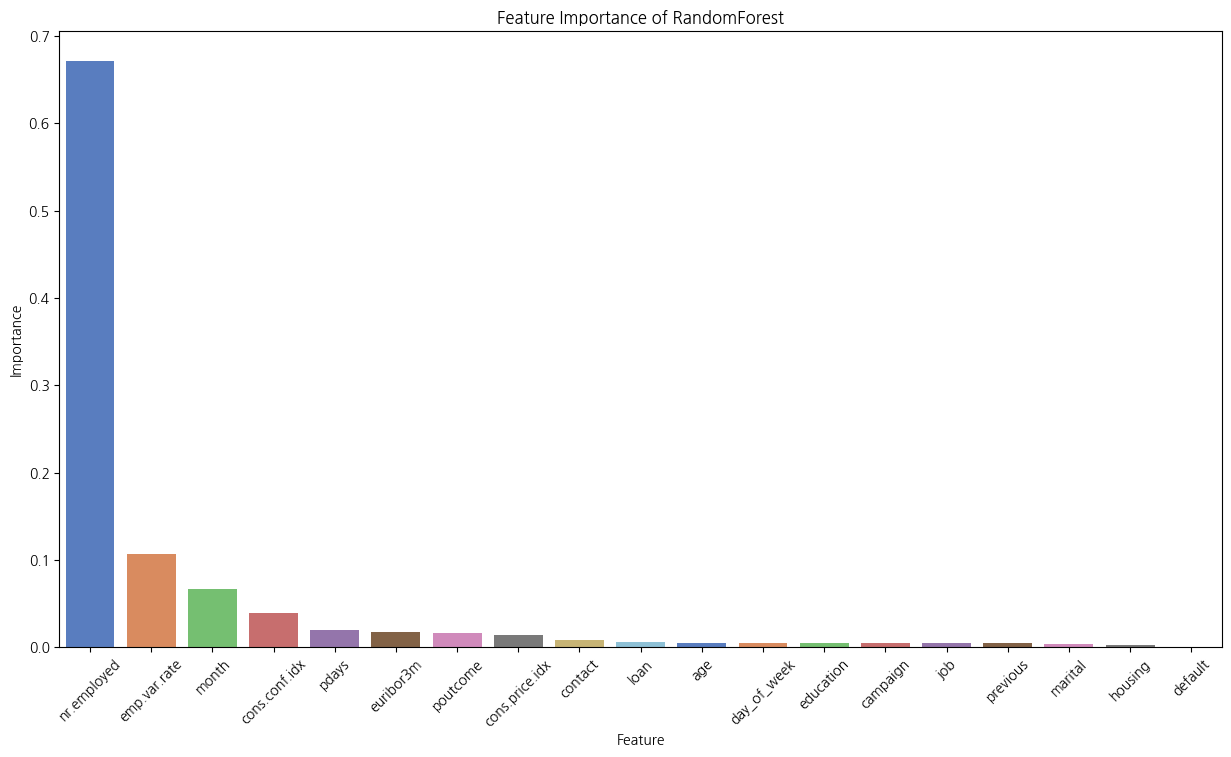

In [ ]:
feature_importances_plt(xgb_model, X_train, 'Feature Importance of RandomForest')

### **LightGBM**

In [ ]:
lgbm_model = select_fit_grid_model('LGBM', X_train, y_train)

y_pred = lgbm_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 2686, number of negative: 18655
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 460
[LightGBM] [Info] Number of data points in the train set: 21341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best Parameters: {'class_weight': 'balanced', 'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 40, 'subsample': 0.8}
Best Score: 0.5054146447844372
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      7974
           1       0.42      0.63      0.51      1173

    accuracy                           0.84      9147
   macro avg       0.68      0.75      0.71      9147
weighted avg   

LightGBM의 Feature Importace 출력 그래프

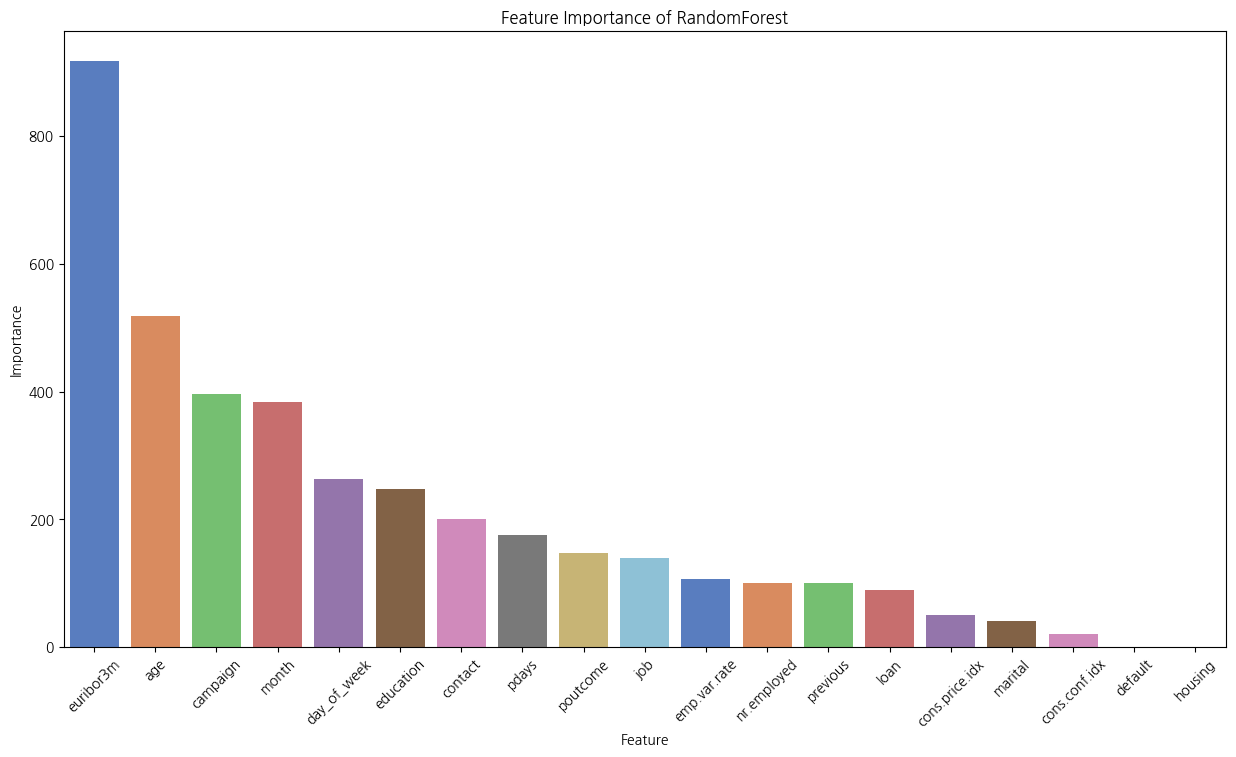

In [ ]:
feature_importances_plt(lgbm_model, X_train, 'Feature Importance of RandomForest')

## **모델링 분석 인사이트**

- RandomForest의 F1 스코어가 잘 나왔다는 것을 알 수 있다.
- 연속형 변수 중, 상관계수가 많이 높게 나왔던 컬럼인 `euribor3m` , `nr.employed`, `emp.var.rate`, `cons.corf.idx`, `cons.price.idx`이 변수 중요도에서 가장 높게 나타나있다는 것을 알 수 있다.
- 범주형 변수는 `age` 컬럼이 가장 높게 나타난 것을 확인할 수 있었다.

# **분석 결과**

EDA를 통해 나온 분석 인사이트와 모델링 인사이트를 통해 나온 분석 인사이트를 통해 다음과 같은 결론을 낼 수 있었다.

## 전략의 핵심 방향

- 현재 소비자 신뢰지수가 낮고, 고금리 상황임.
- 따라서, 고객이 예금 상품을 선택할 수 있도록 신뢰를 높이고 맞춤형 혜택을 제공해야 함.
- 특히, 20~30대 직장인을 타겟팅하는 전략이 필요.

## 소비자 신뢰 회복을 위한 마케팅 전략

- “안정적인 금융 환경 속에서 당신의 돈을 안전하게 불릴 수 있습니다.” 라는 메시지 전달
- 예금 이자를 실질적인 가치로 환산하여 보여주기
- 고객 성공 사례 홍보
- 금융 전문가 인터뷰 및 경제 전망 자료를 활용한 콘텐츠 제공

## 20~30대 맞춤형 예금 상품 개발

- 소액 예금 가능 상품 출시
    - 자유 입출금 예금과 정기 예금을 결합한 하이브리드 상품 제공
- 보너스 혜택 제공
- 모바일 최적화
    - 예금 가입을 모바일에서 1분 내 가능하도록 UX/UI 최적화

## 고용 상태에 따른 맞춤 금융 솔루션

- 직장인 대상 고금리 예금 상품 홍보
- 프리랜서 및 자영업자 대상 유동성 예금 상품 개발
    - 일정 기간 후 부분 인출 가능한 예금 상품 출시
- 고객 대상 금융 컨설팅 제공